In [ ]:
!pip install datasets

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
dataset = load_dataset("nateraw/us-accidents", split='train')

df = dataset.to_pandas()

csv_filename = 'us_accidents.csv'
df.to_csv(csv_filename, index=False)

print(f'Dataset saved as {csv_filename}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.10k [00:00<?, ?B/s]

US_Accidents_Dec21_updated.csv:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2845342 [00:00<?, ? examples/s]

Dataset saved as us_accidents.csv


### **Task 1: Get and inspect the data, find data inconsistencies**



#### **Inspect the data**

In [ ]:
df = pd.read_csv(csv_filename)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
print(df.dtypes)
df.info()

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Cond

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for ID:
ID
A-1          1
A-1896898    1
A-1896890    1
A-1896891    1
A-1896892    1
            ..
A-948450     1
A-948451     1
A-948452     1
A-948453     1
A-2845342    1
Name: count, Length: 2845342, dtype: int64


Value counts for Start_Time:
Start_Time
2021-01-26 16:16:13    214
2021-01-26 16:17:33    150
2021-02-16 06:42:43    130
2021-05-03 06:29:42     92
2021-04-26 08:58:47     87
                      ... 
2021-10-08 03:58:30      1
2021-12-16 23:53:00      1
2021-07-27 18:46:31      1
2021-10-26 17:37:30      1
2019-08-23 18:52:06      1
Name: count, Length: 1959333, dtype: int64


Value counts for End_Time:
End_Time
2021-11-22 08:00:00    88
2017-05-15 15:22:55    58
2019-10-26 09:14:51    47
2020-02-14 00:00:00    46
2020-02-12 00:00:00    42
                       ..
2021-05-28 19:21:06     1
2021-10-30 08:31:00     1
2021-08-16 12:51:25     1
2021-11-06 12:01:30     1
2019-08-23 19:21:31     1
Name: count, Length: 2351505, dtype: int64


Value counts for 

#### **Find data inconsistencies**

In [ ]:
duplicate_ids = df['ID'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

Number of duplicate IDs: 0


In [ ]:
negative_distances = df[df['Distance(mi)'] < 0]
print(f"Number of records with negative distances: {negative_distances.shape[0]}")

invalid_temperatures = df[(df['Temperature(F)'] < -200) | (df['Temperature(F)'] > 200)]
print(f"Number of records with invalid temperatures: {invalid_temperatures.shape[0]}")

Number of records with negative distances: 0
Number of records with invalid temperatures: 0


In [ ]:
print("Unique values in 'Severity':", df['Severity'].unique())

print("Unique values in 'Weather_Condition':")
print(df['Weather_Condition'].unique())

Unique values in 'Severity': [3 2 4 1]
Unique values in 'Weather_Condition':
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / 

In [ ]:
invalid_lat = df[(df['Start_Lat'] < -90) | (df['Start_Lat'] > 90)]
print(f"Number of records with invalid latitude: {invalid_lat.shape[0]}")

invalid_lng = df[(df['Start_Lng'] < -180) | (df['Start_Lng'] > 180)]
print(f"Number of records with invalid longitude: {invalid_lng.shape[0]}")

Number of records with invalid latitude: 0
Number of records with invalid longitude: 0


#### **Visualize the data**

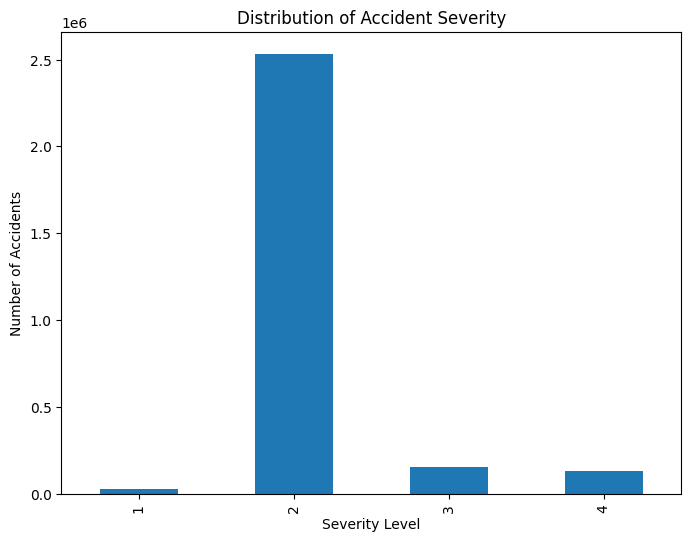

In [ ]:
severity_counts = df['Severity'].value_counts().sort_index()
severity_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

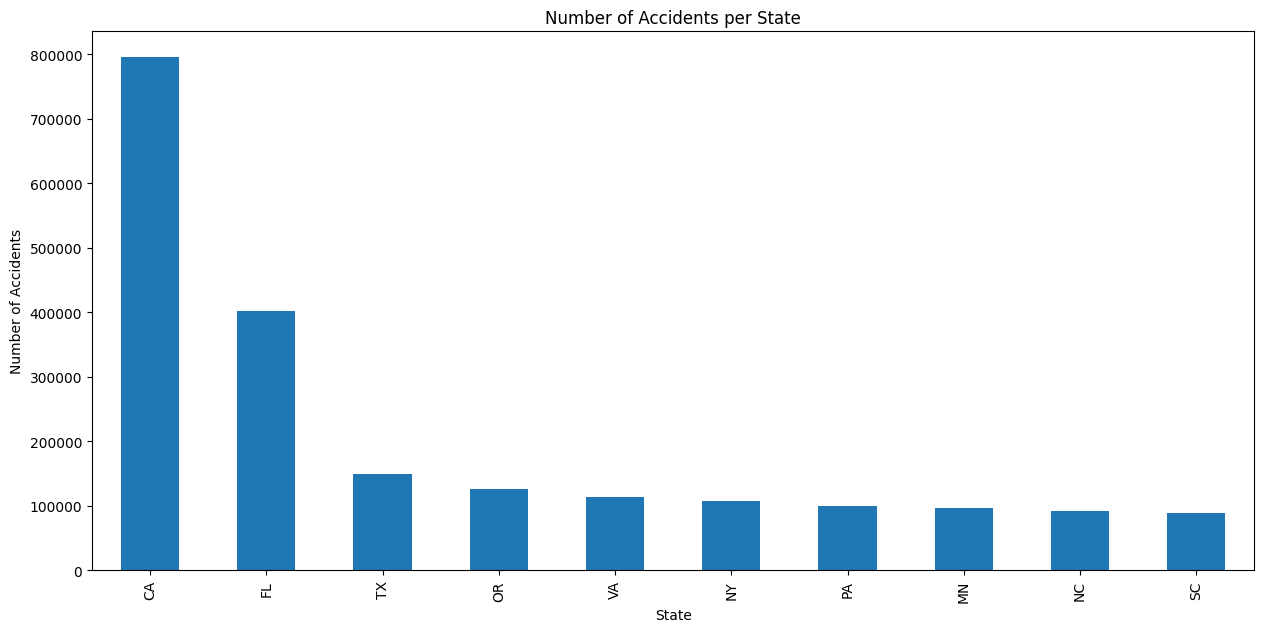

In [ ]:
accidents_per_state = df['State'].value_counts().head(10)
plt.figure(figsize=(15, 7))
accidents_per_state.plot(kind='bar')
plt.title('Number of Accidents per State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

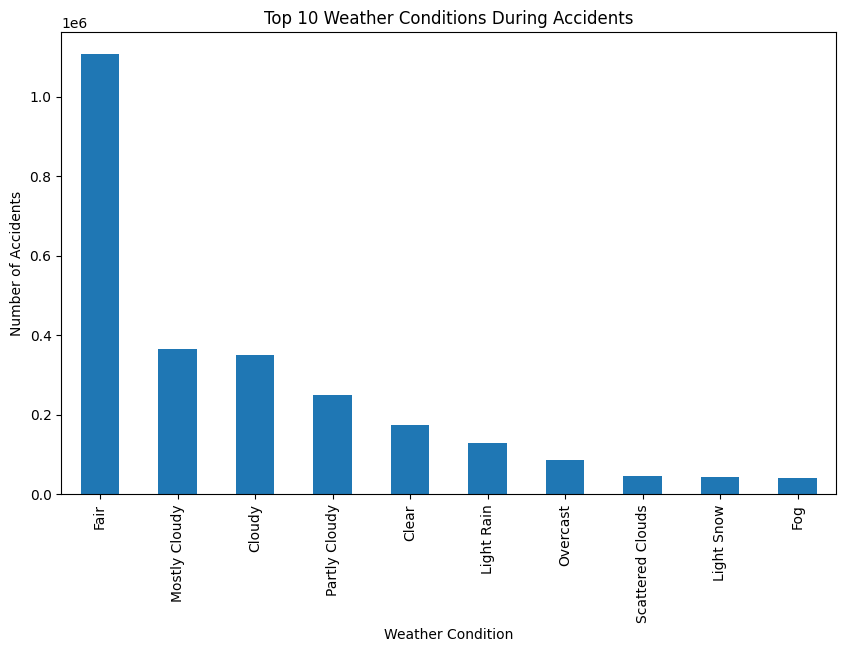

In [ ]:
top_weather_conditions = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_weather_conditions.plot(kind='bar')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

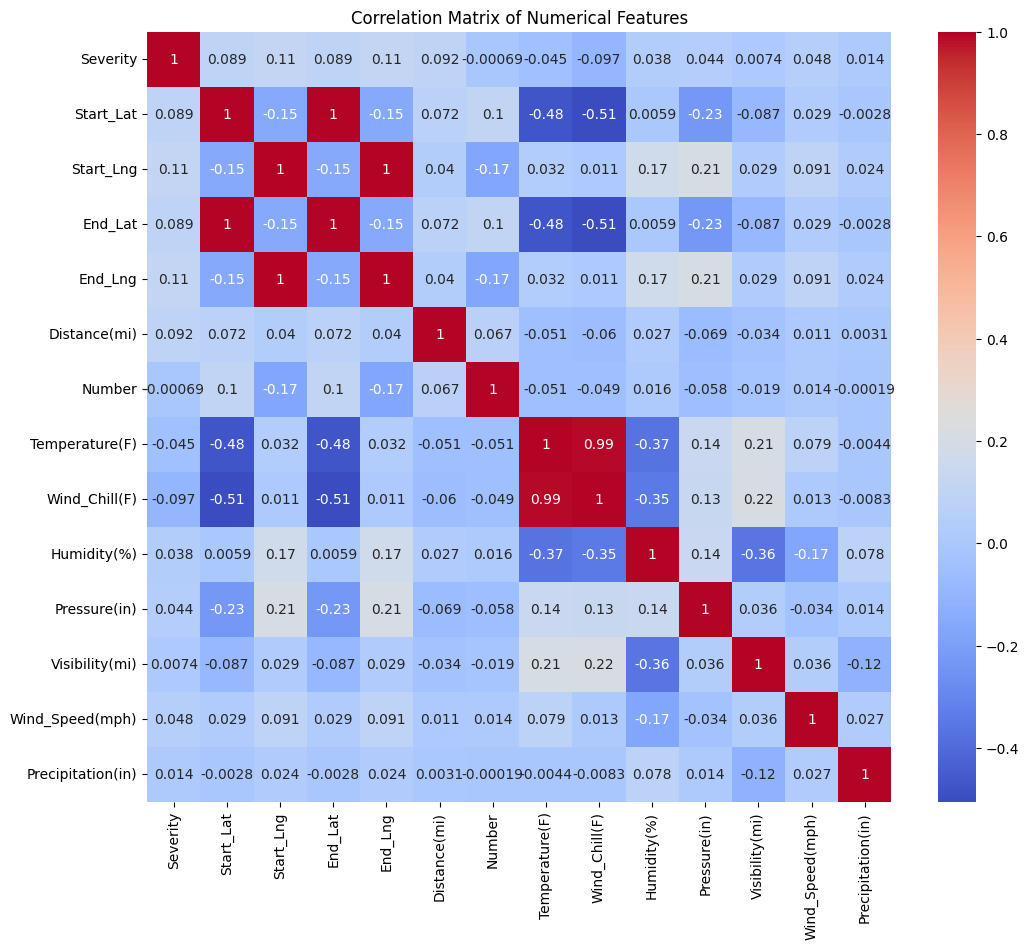

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

numerical_cols = numerical_cols.drop(['Start_Time', 'End_Time'], errors='ignore')

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

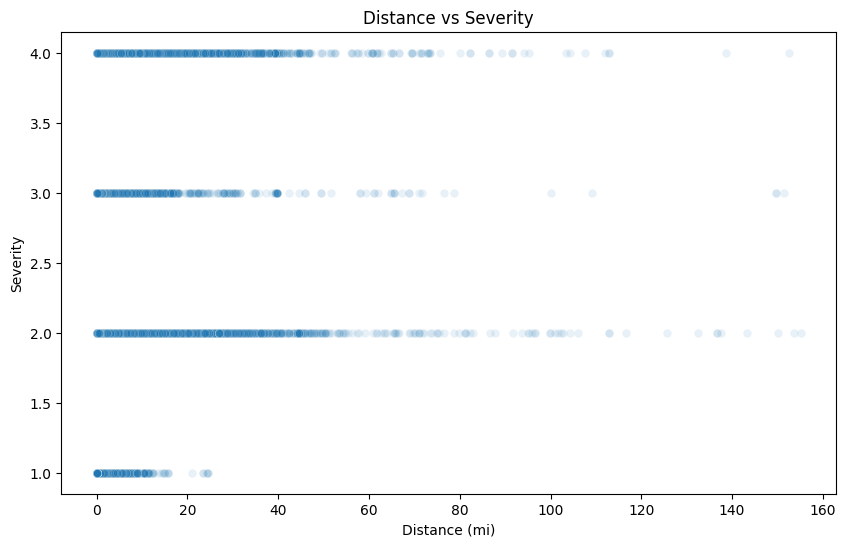

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance(mi)', y='Severity', alpha=0.1)
plt.title('Distance vs Severity')
plt.xlabel('Distance (mi)')
plt.ylabel('Severity')
plt.show()

Number of NaT in 'Start_Time': 282352
Accident counts per year:
Year
2016     122024
2017     163918
2018     163175
2019     258613
2020     600117
2021    1255143
Name: count, dtype: int64


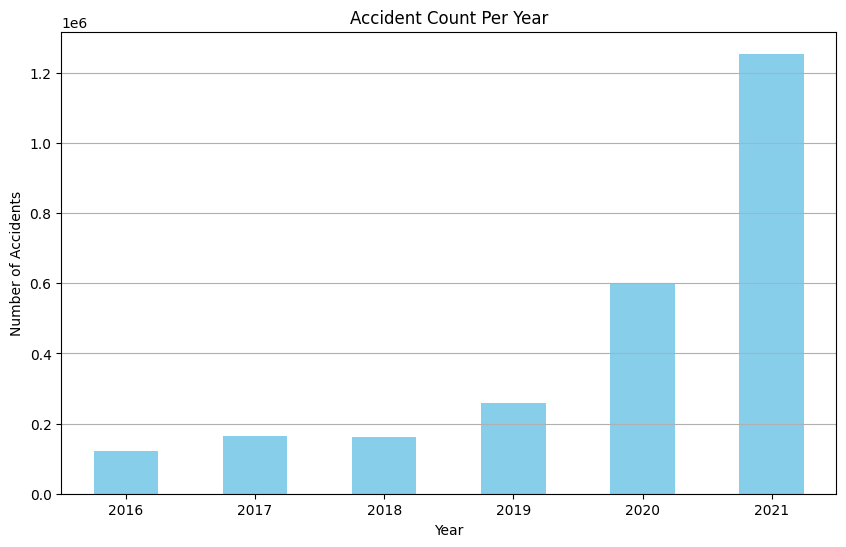

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

print("Number of NaT in 'Start_Time':", df['Start_Time'].isna().sum())

df1 = df.dropna(subset=['Start_Time']).reset_index(drop=True)

df1['Year'] = df1['Start_Time'].dt.year

accidents_per_year = df1['Year'].value_counts().sort_index()

print("Accident counts per year:")
print(accidents_per_year)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='bar', color='skyblue')
plt.title('Accident Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### **Task 2: Type conversion**

*   Calculate the difference between the start time and the end time (as hour: minute )
*   Find the average difference as total minute (1 hour -> 60 minutes).
*   Extract the year (both start time and end time)


In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

print("Number of NaT in 'Start_Time':", df['Start_Time'].isna().sum())
print("Number of NaT in 'End_Time':", df['End_Time'].isna().sum())

df = df.dropna(subset=['Start_Time', 'End_Time']).reset_index(drop=True)

Number of NaT in 'Start_Time': 282352
Number of NaT in 'End_Time': 282352


Calculate the time difference as hours and minutes

In [ ]:
df['Time_Difference'] = df['End_Time'] - df['Start_Time']

df = df[df['Time_Difference'] > pd.Timedelta(0)]

df['Total_Seconds'] = df['Time_Difference'].dt.total_seconds()

df['Hours'] = (df['Total_Seconds'] // 3600).astype(int)
df['Minutes'] = ((df['Total_Seconds'] % 3600) // 60).astype(int)

df['Time_Diff_HH_MM'] = df['Hours'].astype(str) + ':' + df['Minutes'].astype(str).str.zfill(2)

# Display the first few rows
print(df[['Start_Time', 'End_Time', 'Time_Diff_HH_MM']].head())

           Start_Time            End_Time Time_Diff_HH_MM
0 2016-02-08 00:37:08 2016-02-08 06:37:08            6:00
1 2016-02-08 05:56:20 2016-02-08 11:56:20            6:00
2 2016-02-08 06:15:39 2016-02-08 12:15:39            6:00
3 2016-02-08 06:51:45 2016-02-08 12:51:45            6:00
4 2016-02-08 07:53:43 2016-02-08 13:53:43            6:00


Find the average difference in total minutes

In [ ]:
df['Total_Minutes'] = df['Total_Seconds'] / 60

average_minutes = df['Total_Minutes'].mean()
print(f"average difference between 'Start_Time' and 'End_Time' is {average_minutes:.2f} minutes")

average difference between 'Start_Time' and 'End_Time' is 362.47 minutes


Extract the Year from Start_Time and End_Time

In [ ]:
df['Start_Year'] = df['Start_Time'].dt.year
df['End_Year'] = df['End_Time'].dt.year

print(df[['Start_Time', 'Start_Year', 'End_Time', 'End_Year']].head())

           Start_Time  Start_Year            End_Time  End_Year
0 2016-02-08 00:37:08        2016 2016-02-08 06:37:08      2016
1 2016-02-08 05:56:20        2016 2016-02-08 11:56:20      2016
2 2016-02-08 06:15:39        2016 2016-02-08 12:15:39      2016
3 2016-02-08 06:51:45        2016 2016-02-08 12:51:45      2016
4 2016-02-08 07:53:43        2016 2016-02-08 13:53:43      2016


###**Task 3: Descriptive statistics**
* Generate basic descriptive statistics (mean, median, standard deviation, etc.)

In [ ]:
# % of missing values in numerical columns
missing_percentage = df.isnull().sum() / df.shape[0] * 100

missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': missing_percentage
})

print("Missing values in numerical columns:")
print(missing_data.loc[numerical_cols].sort_values(by='Percentage (%)', ascending=False))

Missing values in numerical columns:
                   Missing Values  Percentage (%)
Number                    1592265       62.125291
Precipitation(in)          536559       20.934885
Wind_Chill(F)              461098       17.990628
Wind_Speed(mph)            150207        5.860616
Humidity(%)                 66021        2.575937
Visibility(mi)              63906        2.493416
Temperature(F)              62560        2.440899
Pressure(in)                53386        2.082958
Severity                        0        0.000000
Start_Lat                       0        0.000000
Start_Lng                       0        0.000000
End_Lat                         0        0.000000
End_Lng                         0        0.000000
Distance(mi)                    0        0.000000


In [ ]:
df = df.drop(columns=['Number'])

In [ ]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())

df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].median())

df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())

df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median())

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_stats = df[numerical_cols].describe()
print("Summary statistics for numerical columns:")
print(numerical_stats)

Summary statistics for numerical columns:
           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.562990e+06  2.562990e+06  2.562990e+06  2.562990e+06  2.562990e+06   
mean   2.148521e+00  3.631740e+01 -9.734143e+01  3.631752e+01 -9.734120e+01   
std    4.949364e-01  5.346402e+00  1.834949e+01  5.346470e+00  1.834931e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.350093e+01 -1.180754e+02  3.350110e+01 -1.180758e+02   
50%    2.000000e+00  3.615395e+01 -9.300919e+01  3.615396e+01 -9.300899e+01   
75%    2.000000e+00  4.023312e+01 -8.038869e+01  4.023311e+01 -8.038885e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  2.562990e+06    2.562990e+06   2.562990e+06  2.562990e+06   
mean   6.903032e-01    6.170107e+01   6.002049e+01  6.438262e+01   
std    1.567570e+00    1.838702e+01   1.92

In [ ]:
import numpy as np

variance = df[numerical_cols].var()
print("\nVariance for numerical columns:")
print(variance)

mode = df[numerical_cols].mode().iloc[0].round(3)
print("\nMode for numerical columns:")
print(mode)


Variance for numerical columns:
Severity             2.449620e-01
Start_Lat            2.858401e+01
Start_Lng            3.367037e+02
End_Lat              2.858474e+01
End_Lng              3.366972e+02
Distance(mi)         2.457274e+00
Temperature(F)       3.380826e+02
Wind_Chill(F)        3.716829e+02
Humidity(%)          5.114871e+02
Pressure(in)         1.069024e+00
Visibility(mi)       7.342992e+00
Wind_Speed(mph)      2.901892e+01
Precipitation(in)    7.644419e-03
Total_Seconds        3.168000e+11
Hours                2.444312e+04
Minutes              3.031434e+02
Total_Minutes        8.800000e+07
dtype: float64

Mode for numerical columns:
Severity                 2.000
Start_Lat               25.702
Start_Lng              -80.332
End_Lat                 25.702
End_Lng                -80.334
Distance(mi)             0.000
Temperature(F)          63.000
Wind_Chill(F)           63.000
Humidity(%)             67.000
Pressure(in)            29.830
Visibility(mi)          10.000
Wind

In [ ]:
missing_values = df[numerical_cols].isnull().sum()
print("Missing values in numerical columns:")
print(missing_values)

Missing values in numerical columns:
Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Total_Seconds        0
Hours                0
Minutes              0
Total_Minutes        0
dtype: int64


### **Task 4:** Use you own EDA methods for further analysis, visualize the findings and provide your interpretations.

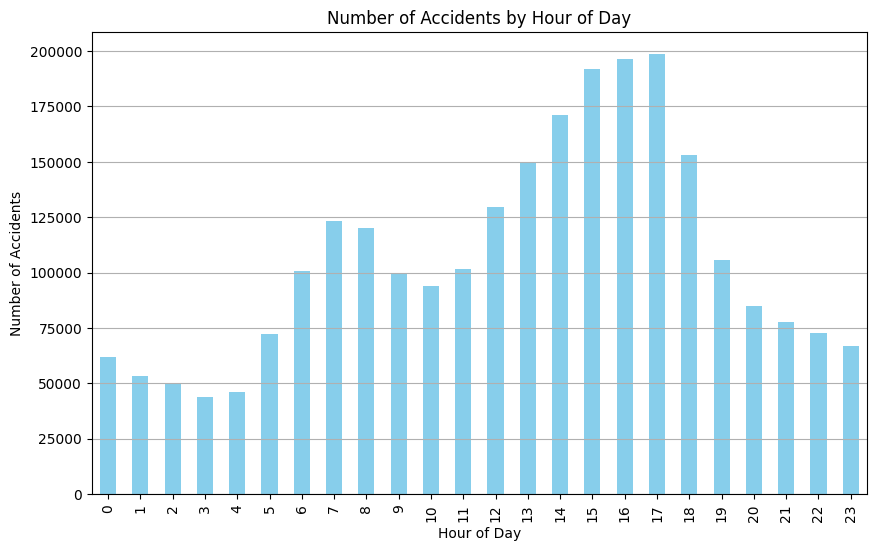

In [ ]:
df['Hour'] = df['Start_Time'].dt.hour
accidents_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accidents_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

# As can be seen from this graph, the hours when the most accidents occur in America are between 16:00 and 17:00 in the evening. The hours when the least accidents occur are between 3:00 and 4:00 in the morning.

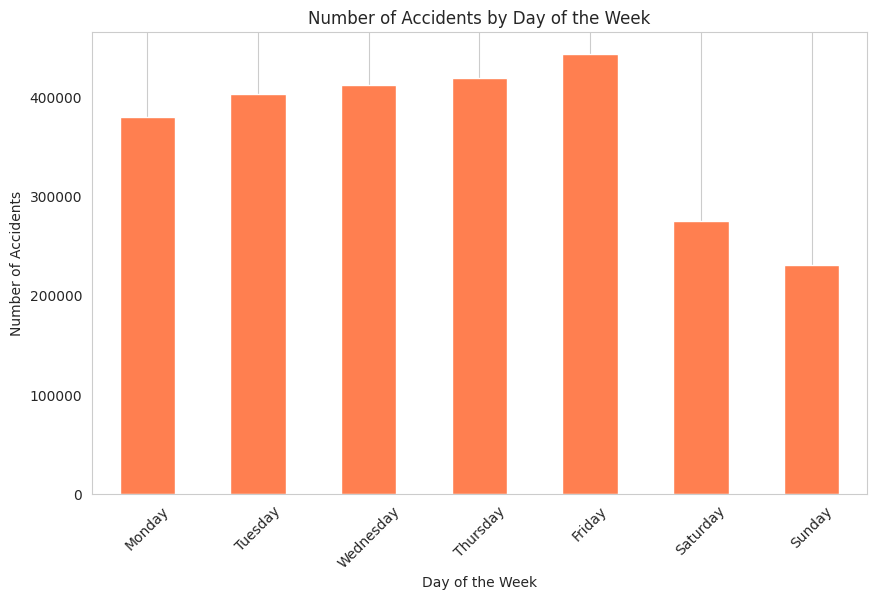

In [ ]:
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

accidents_by_day = df['Day_of_Week'].value_counts()

plt.figure(figsize=(10, 6))
accidents_by_day.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='coral')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# As can be seen from the graph, the number of accidents is considerably higher on weekdays, especially on Fridays, than on weekends.

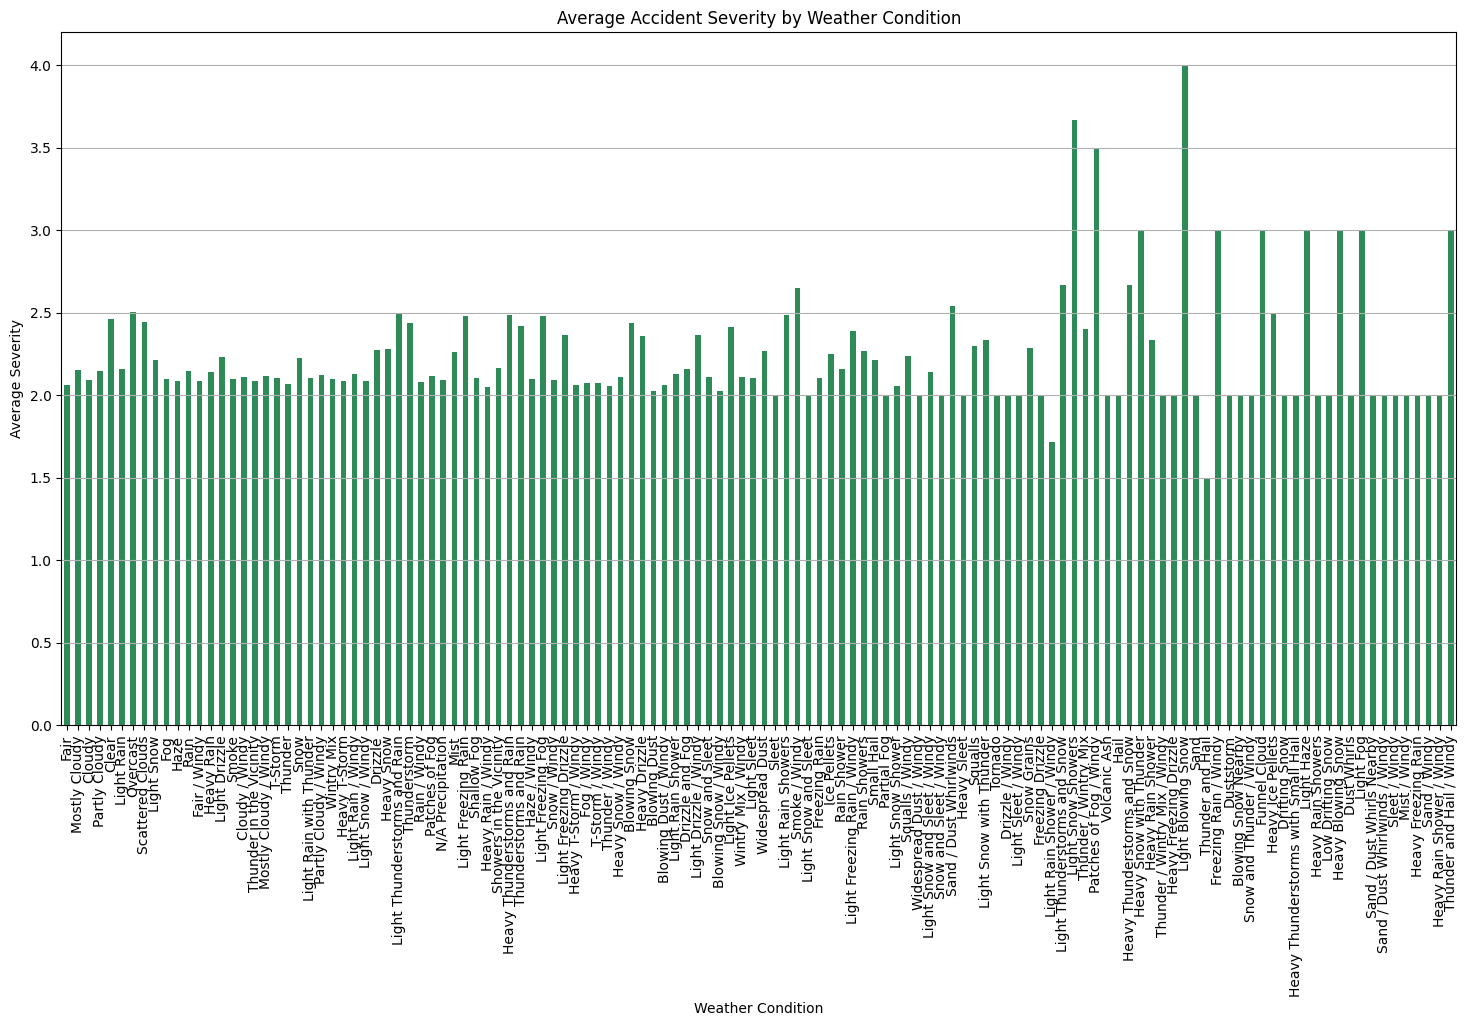

In [ ]:
# average severity by weather condition
severity_by_weather = df.groupby('Weather_Condition')['Severity'].mean()

weather_conditions = df['Weather_Condition'].value_counts().index

severity_weather = severity_by_weather.loc[weather_conditions]

plt.figure(figsize=(18, 9))
severity_weather.plot(kind='bar', color='seagreen')
plt.title('Average Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Severity')
plt.grid(axis='y')
plt.show()

# If we look at the top three weather conditions that cause the highest severity accidents, light blowing snow is in first place by far. Light snow shower is in second place, followed by Patches of fog / windy weather. From here, we can say that the probability of an accident severity is higher in weather conditions where the ground is slippery and the road is not fully visible.

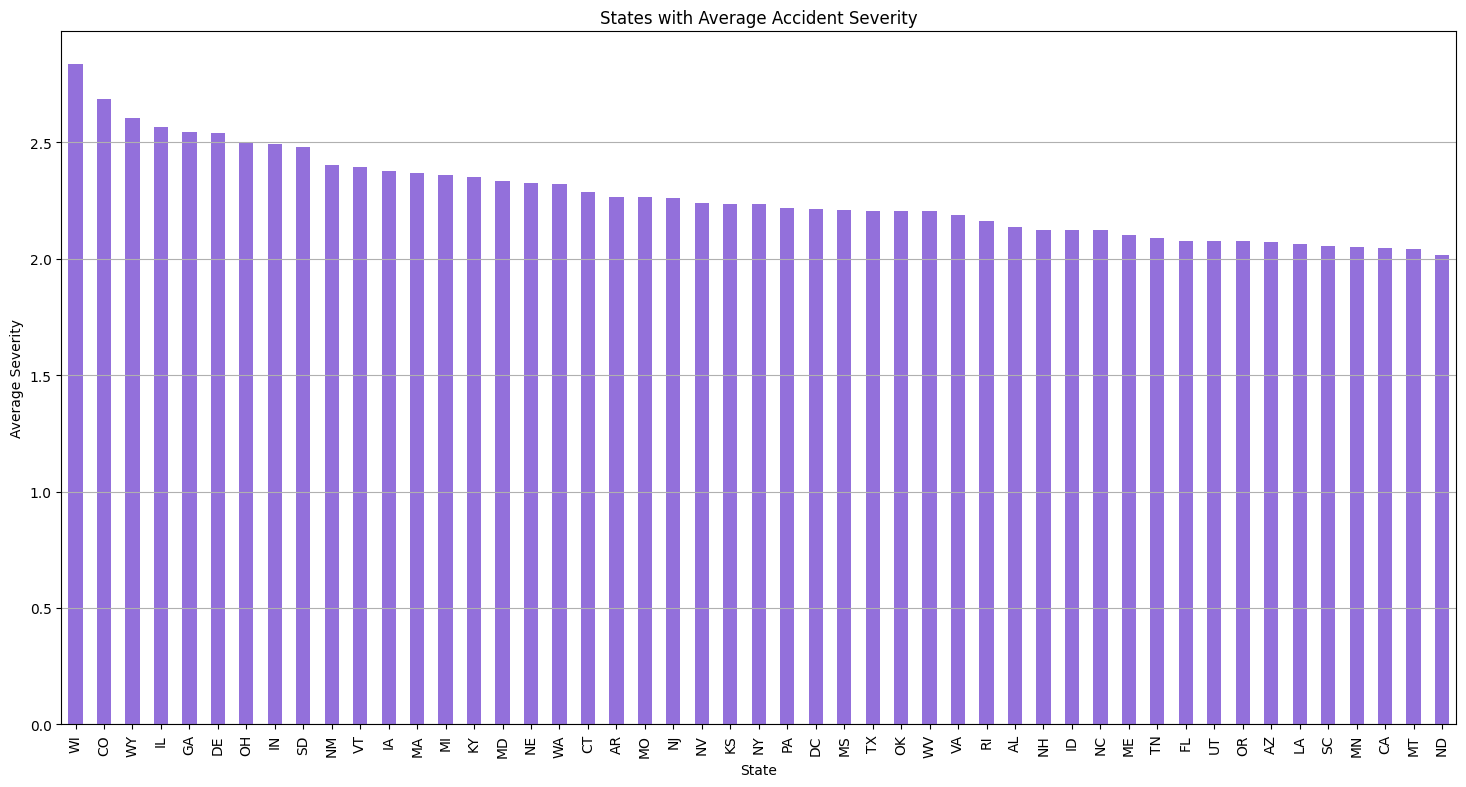

In [ ]:
# average severity by state
severity_by_state = df.groupby('State')['Severity'].mean()

top_states_severity = severity_by_state.sort_values(ascending=False)

plt.figure(figsize=(18, 9))
top_states_severity.plot(kind='bar', color='mediumpurple')
plt.title('States with Average Accident Severity')
plt.xlabel('State')
plt.ylabel('Average Severity')
plt.grid(axis='y')
plt.show()

# When we look at the states, although there is not much difference in terms of accident severity rates, we can say that the most severe accidents occur in the state of Wisconsin.

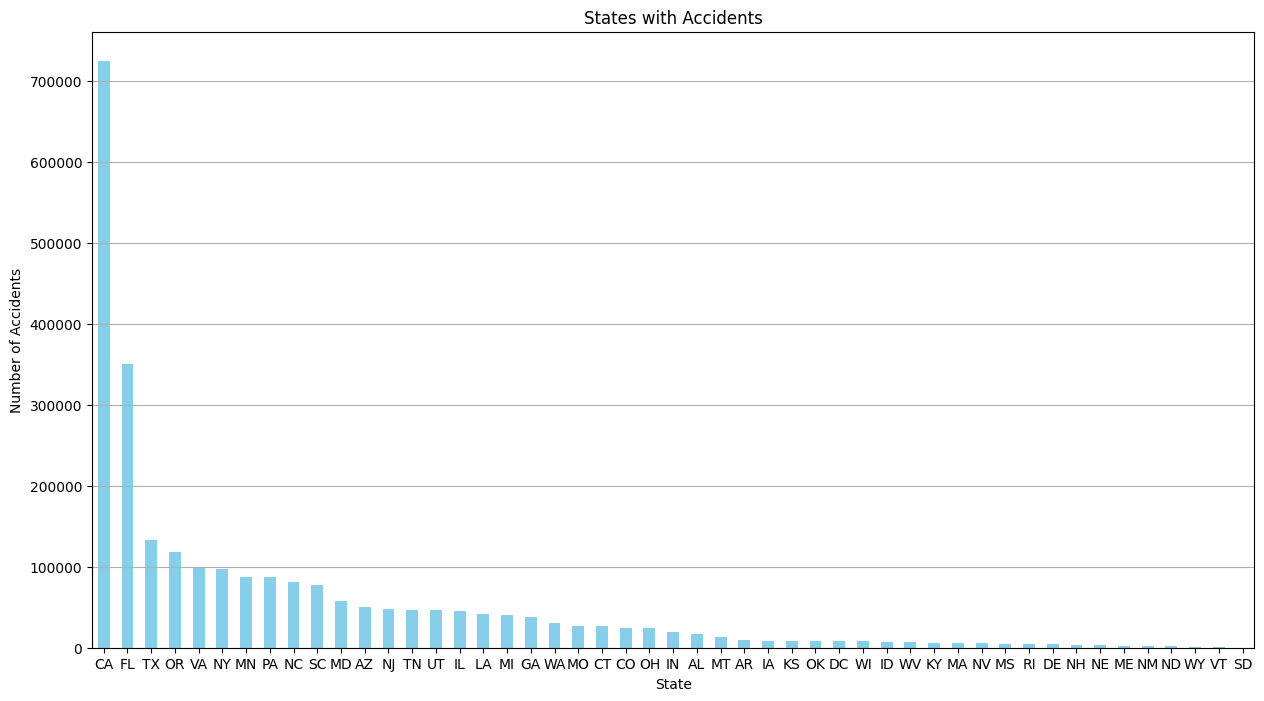

In [ ]:
states = df['State'].value_counts()

plt.figure(figsize=(15, 8))
states.plot(kind='bar', color='skyblue')
plt.title('States with Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# The state with the most accidents is California, with over 700,000. The state with the closest number of accidents is Florida, with around 350,000.

**Conclusion**

By applying these simple EDA methods, we’ve uncovered valuable insights into the US accidents dataset:

**Temporal Patterns:** Accidents are more frequent during rush hours and weekdays.

**Weather Influence:** Adverse weather conditions are associated with higher accident severity.

**Geographical Insights:** Certain states and locations have higher accident rates or severity, indicating the need for targeted interventions.

#### **Task 5:**
* Which year highest number of accidents?
*What are the top 5 factors that most frequently cause accidents?
*At what time of day do accidents occur most frequently?
*What is the impact of weather conditions on accidents?

In [ ]:
# Which year highest number of accidents?

df['Year'] = df['Start_Time'].dt.year
accidents_per_year = df['Year'].value_counts().sort_values(ascending=False)
print("Accident counts per year:")
print(accidents_per_year)

Accident counts per year:
Year
2021    1255143
2020     600117
2019     258613
2017     163918
2018     163175
2016     122024
Name: count, dtype: int64


In [ ]:
# What are the top 5 factors that most frequently cause accidents?

# boolean columns
road_feature_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

road_feature_counts = {}

for feature in road_feature_columns:
    count = df[df[feature] == True].shape[0]
    road_feature_counts[feature] = count

road_feature_counts_df = pd.DataFrame.from_dict(road_feature_counts, orient='index', columns=['Accident_Count'])

road_feature_counts_df = road_feature_counts_df.sort_values(by='Accident_Count', ascending=False)

print("Top 5 Road Features Associated with Accidents:")
print(road_feature_counts_df.head(5))

weather_condition_counts = df['Weather_Condition'].value_counts().nlargest(5)

print("\nTop 5 Weather Conditions During Accidents:")
print(weather_condition_counts)

road_feature_counts_df_reset = road_feature_counts_df.reset_index()
road_feature_counts_df_reset.rename(columns={'index': 'Factor'}, inplace=True)

weather_condition_counts_df = weather_condition_counts.reset_index()
weather_condition_counts_df.columns = ['Factor', 'Accident_Count']

combined_factors_df = pd.concat([road_feature_counts_df_reset, weather_condition_counts_df], ignore_index=True)

combined_factors_df = combined_factors_df.sort_values(by='Accident_Count', ascending=False)

top_5_factors = combined_factors_df.head(5)

print("\nTop 5 Factors Most Frequently Associated with Accidents:")
print(top_5_factors)

Top 5 Road Features Associated with Accidents:
                Accident_Count
Junction                270983
Traffic_Signal          243266
Crossing                179503
Station                  60337
Stop                     44554

Top 5 Weather Conditions During Accidents:
Weather_Condition
Fair             971736
Mostly Cloudy    328557
Cloudy           308169
Partly Cloudy    226301
Clear            173822
Name: count, dtype: int64

Top 5 Factors Most Frequently Associated with Accidents:
            Factor  Accident_Count
13            Fair          971736
14   Mostly Cloudy          328557
15          Cloudy          308169
0         Junction          270983
1   Traffic_Signal          243266


In [ ]:
# At what time of the day do accidents occur most frequently?

df['Hour'] = df['Start_Time'].dt.hour
accidents_by_hour = df['Hour'].value_counts().sort_values(ascending = False)
print(accidents_by_hour)

Hour
17    198689
16    196517
15    192092
14    171328
18    152890
13    149367
12    129446
7     123202
8     120146
19    105462
11    101636
6     100632
9      99351
10     93691
20     84808
21     77714
22     72596
5      72044
23     66632
0      61832
1      53238
2      49778
4      46234
3      43665
Name: count, dtype: int64


Weather_Condition
Fair                       971736
Mostly Cloudy              328557
Cloudy                     308169
Partly Cloudy              226301
Clear                      173822
Light Rain                 116801
Overcast                    84882
Scattered Clouds            45132
Light Snow                  39510
Fog                         36328
Haze                        32665
Rain                        28205
Fair / Windy                13496
Heavy Rain                  10665
Light Drizzle                6408
Smoke                        6339
Cloudy / Windy               6068
Thunder in the Vicinity      5930
Mostly Cloudy / Windy        5641
T-Storm                      5604
Name: count, dtype: int64 

Weather_Condition
Light Blowing Snow           4.000000
Light Snow Showers           3.666667
Patches of Fog / Windy       3.500000
Freezing Rain / Windy        3.000000
Heavy Snow with Thunder      3.000000
                               ...   
Sand                        

Text(0, 0.5, 'Number of Accidents')

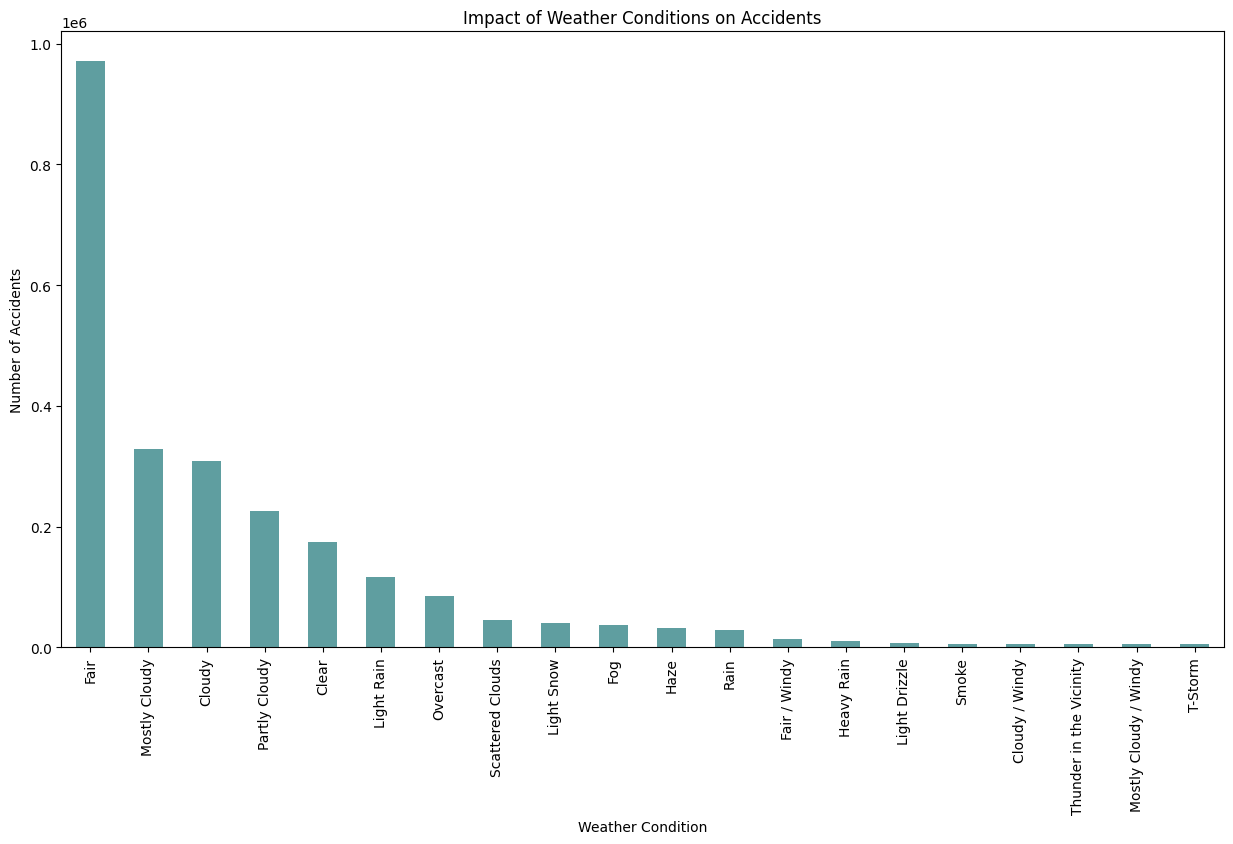

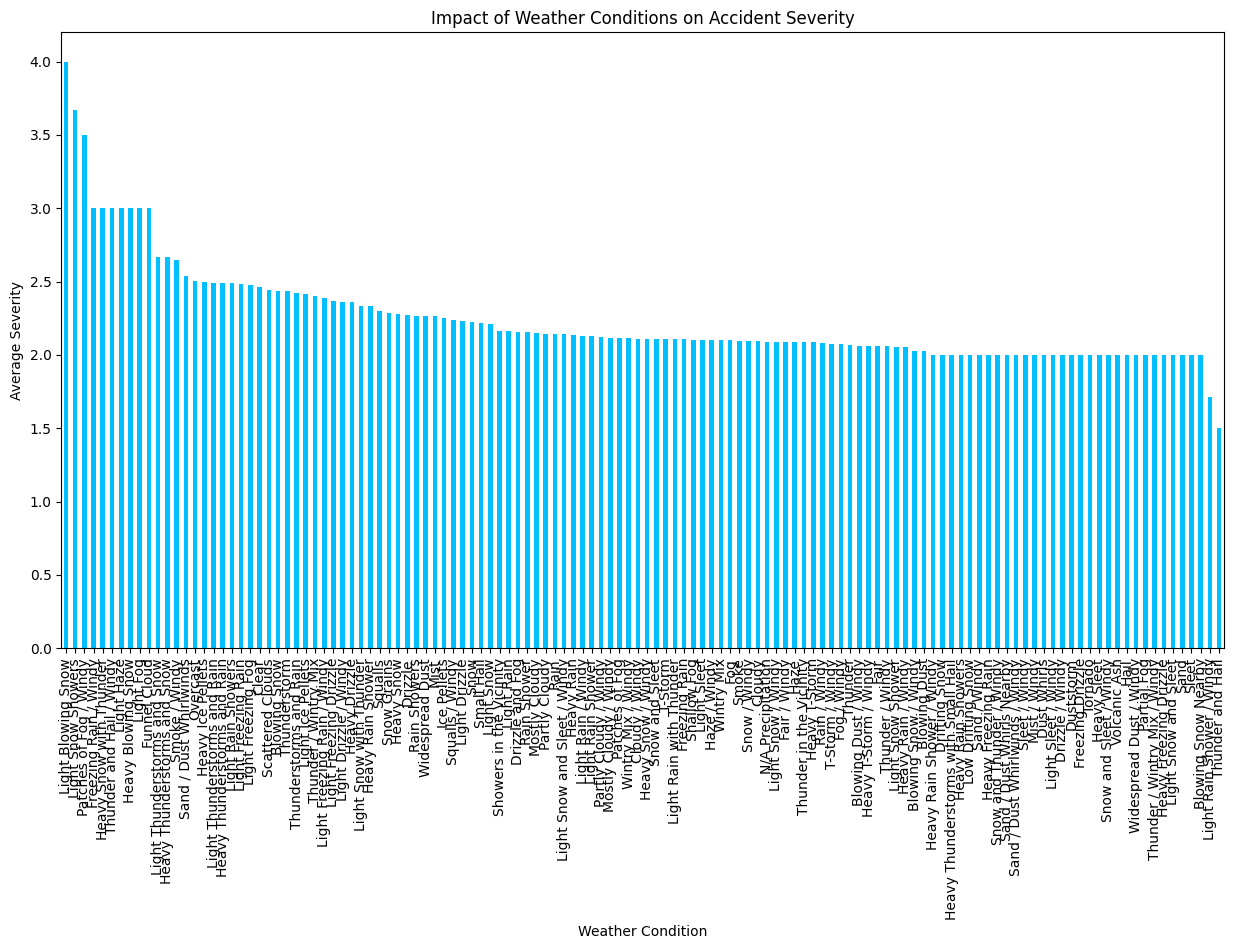

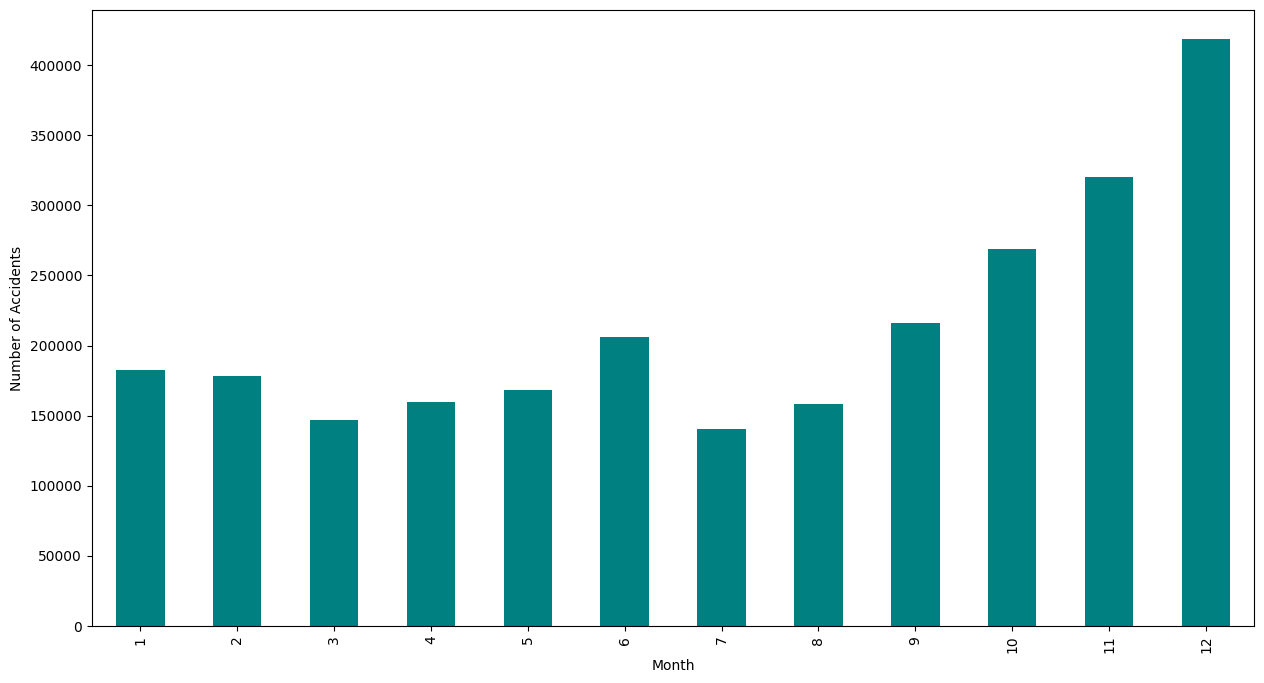

In [ ]:
# What is the impact of weather conditions on accidents?

weather_condition_counts = df['Weather_Condition'].value_counts().sort_values(ascending = False).head(20)
print(weather_condition_counts,'\n')
plt.figure(figsize=(15, 8))
weather_condition_counts.plot(kind='bar', color='cadetblue')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Impact of Weather Conditions on Accidents')


severity_by_weather = df.groupby('Weather_Condition')['Severity'].mean()
weather_conditions = df['Weather_Condition'].value_counts().index
severity_weather = severity_by_weather.loc[weather_conditions].sort_values(ascending = False)
print(severity_weather, '\n')
plt.figure(figsize=(15, 8))
severity_weather.plot(kind='bar', color='deepskyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Average Severity')
plt.title('Impact of Weather Conditions on Accident Severity')

df['Month'] = df['Start_Time'].dt.month
accidents_by_month = df['Month'].value_counts().sort_index()
print(accidents_by_month)
plt.figure(figsize=(15, 8))
accidents_by_month.plot(kind='bar', color='teal')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

### **Task 6: Detect outlier**
Use box plots to visualize outliers in numerical columns and describe any significant outliers identified.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# exclude id and any time columns
numerical_cols = [col for col in numerical_cols if col not in ['ID', 'Total_Seconds', 'Hours', 'Minutes', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng']]

print(numerical_cols)

['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Total_Minutes']


In [ ]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

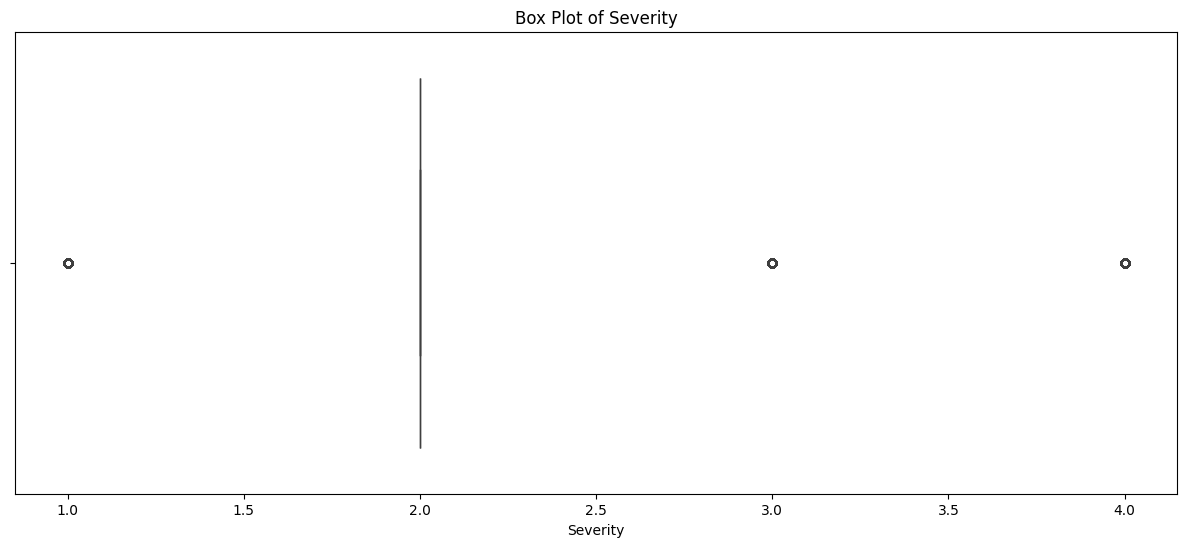

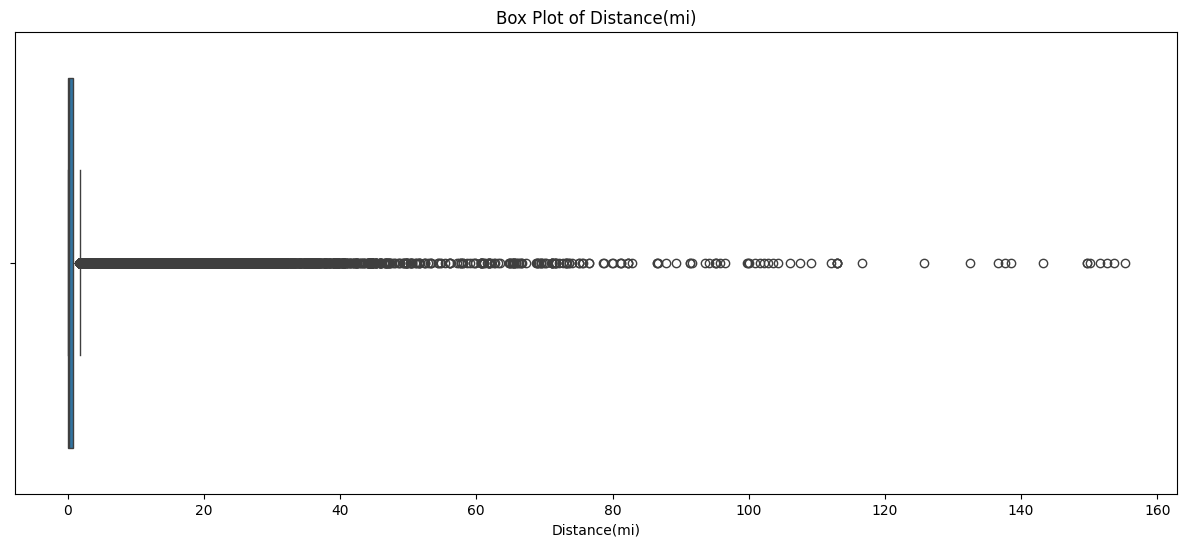

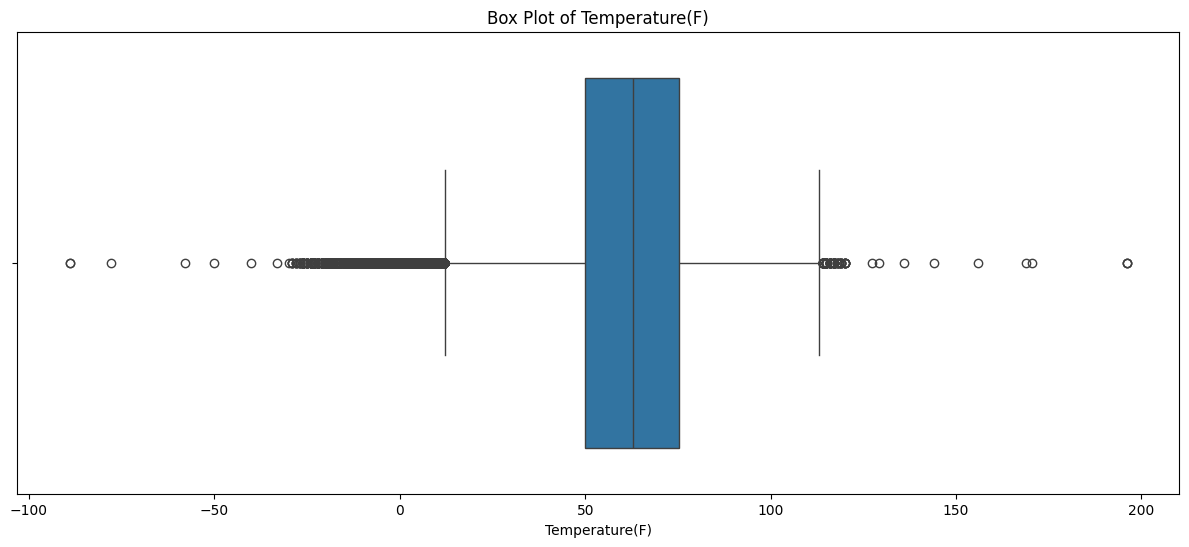

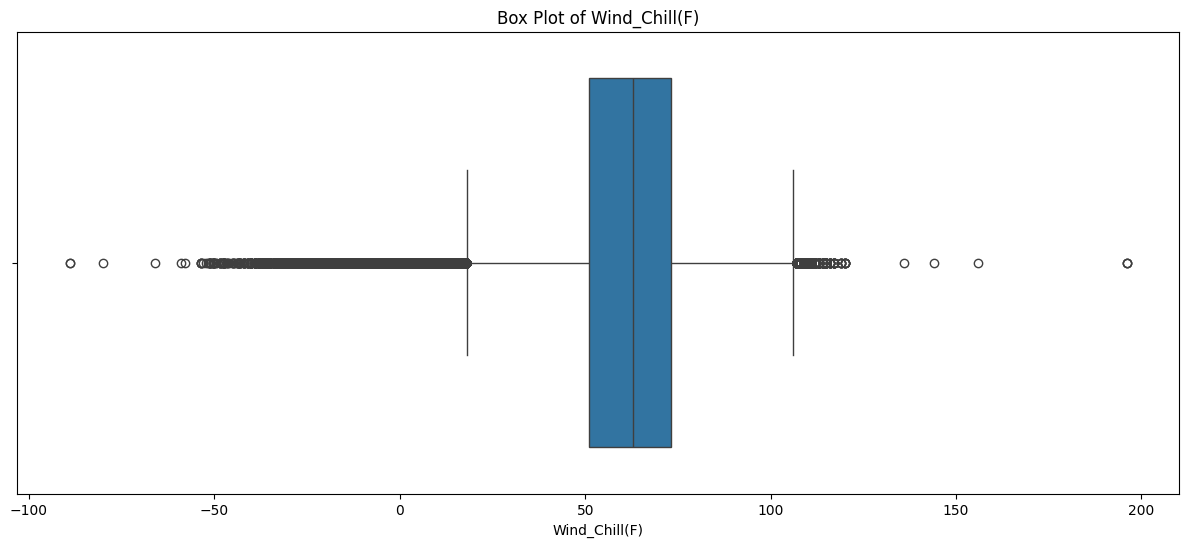

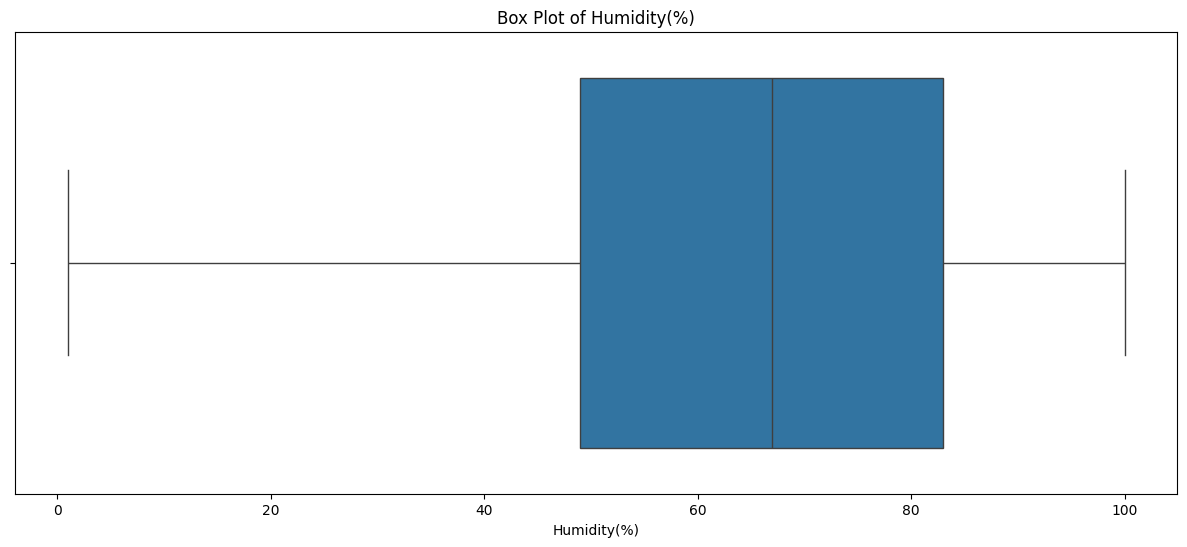

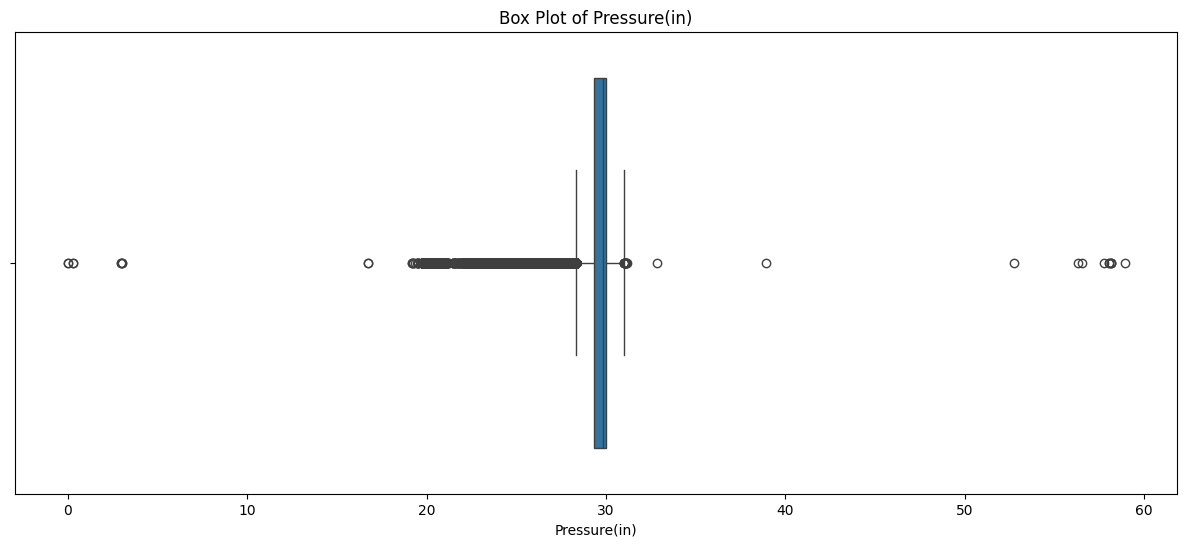

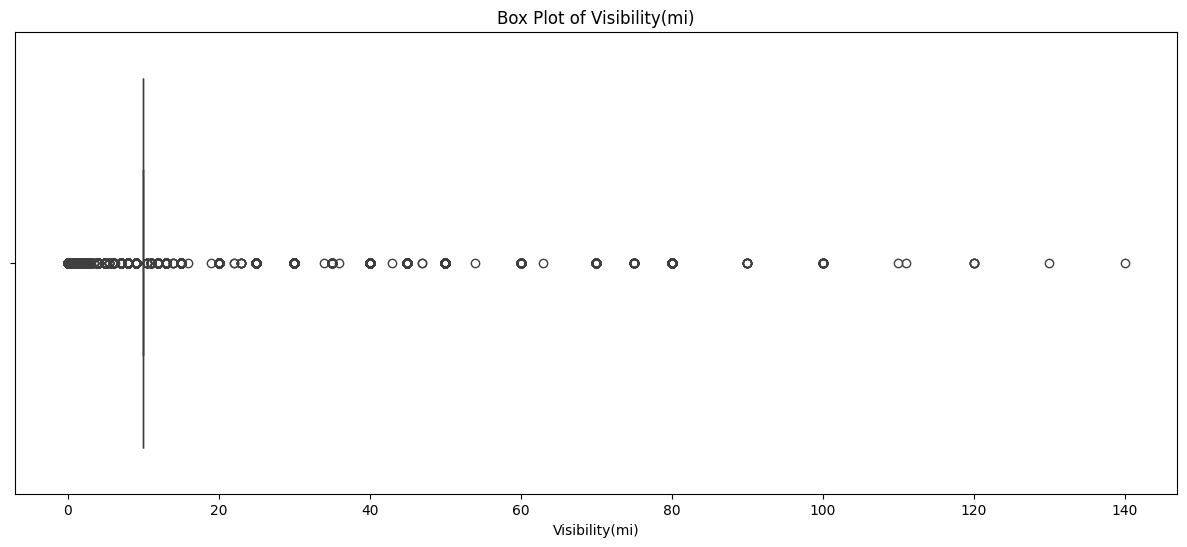

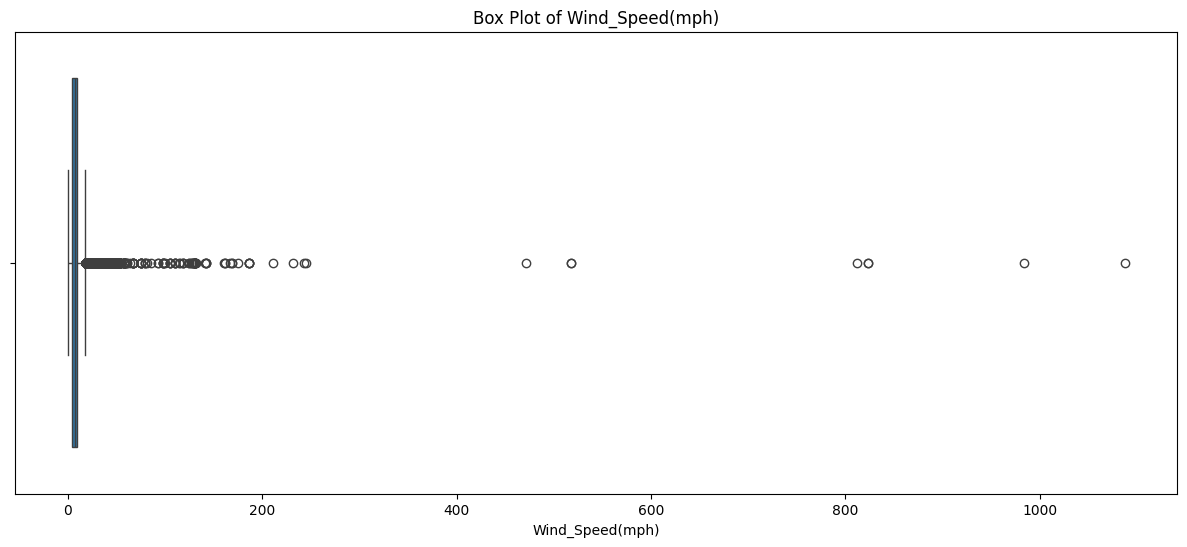

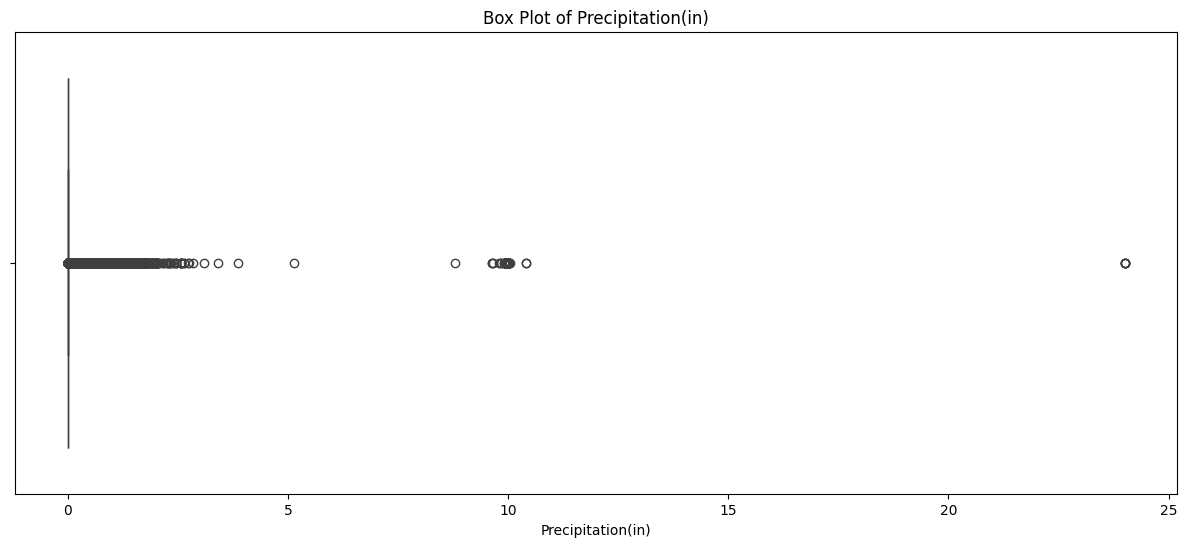

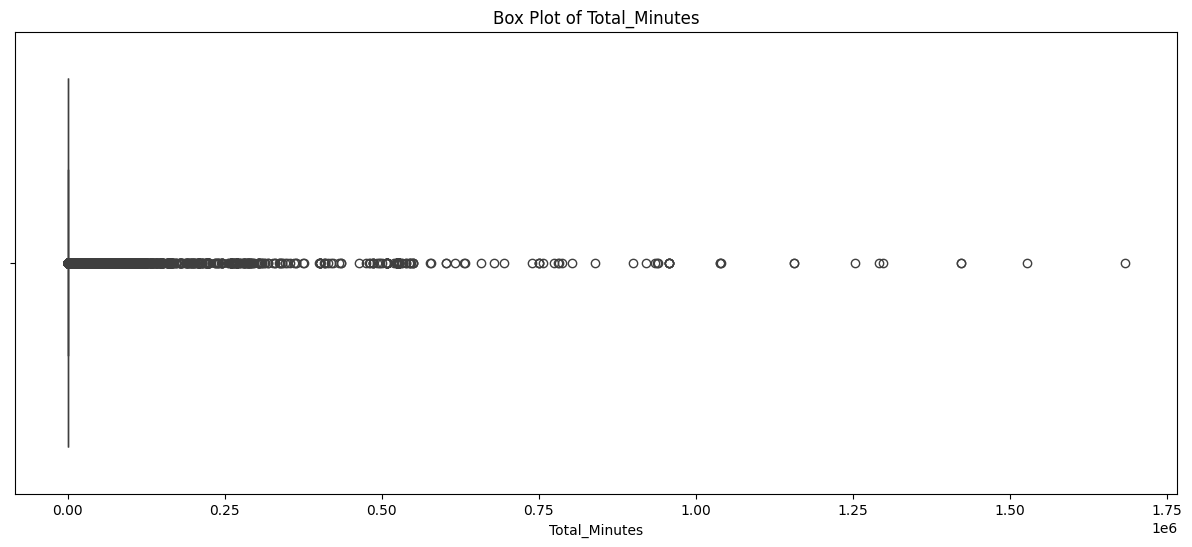

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    '''
  - Severity: outliers present at the 1 and 4
	- Distance (mi): clear outliers are observed far beyond the whiskers (exceeding 80 miles)
	- Temperature (F): outliers are visible both on the low end (below 0 F) and high end (above 100 F)
	- Wind_Chill (F): outliers are present at both extremes
	- Humidity (%): no significant outliers
	- Pressure (in): significant outliers are observed below 28 and above 32 inches
	- Visibility (mi): outliers are visible for values exceeding 20 miles
	- Wind_Speed (mph): extreme outliers are noticeable, especially above 200 mph
	- Precipitation (in): outliers are observed above 5 inches
	- Total_Minutes: outliers are seen beyond the usual range, in very high values
    '''


### **Task 7: Check for correlations**
Calculate the correlation matrix and visualize it.
* Is wind direction a contributing factor to accidents?
* Is humidity a contributing factor to accidents?
* Is there a correlation between temperature and accidents? If there is a correlation, what kind of relationship exists between temperature and accidents?

1.   List item
2.   List item



In [ ]:
numerical_cols1 = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols1 = [col for col in numerical_cols1 if col not in ['ID']]

In [ ]:
for col in numerical_cols1:
    df[col] = df[col].fillna(df[col].median())

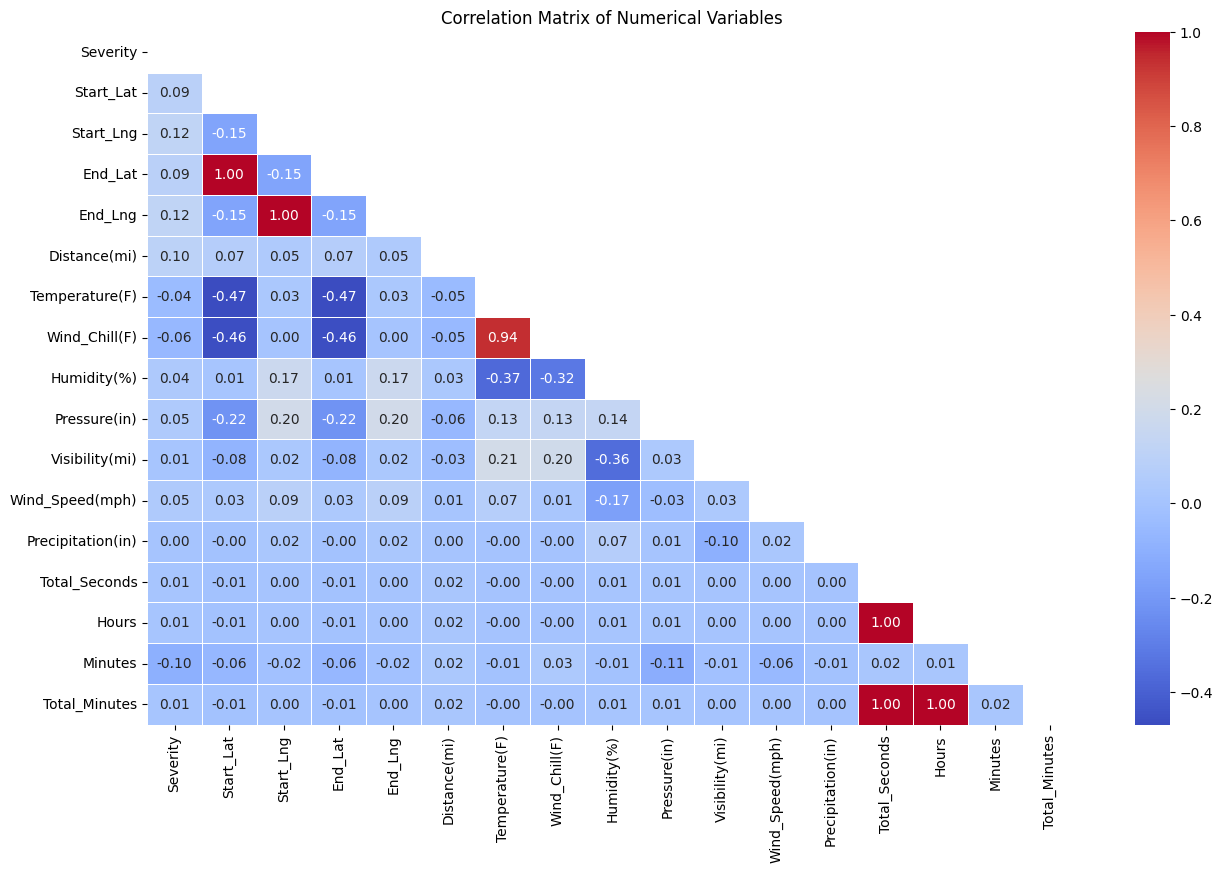

In [ ]:
corr_matrix = df[numerical_cols1].corr()
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

unique wind directions:
['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


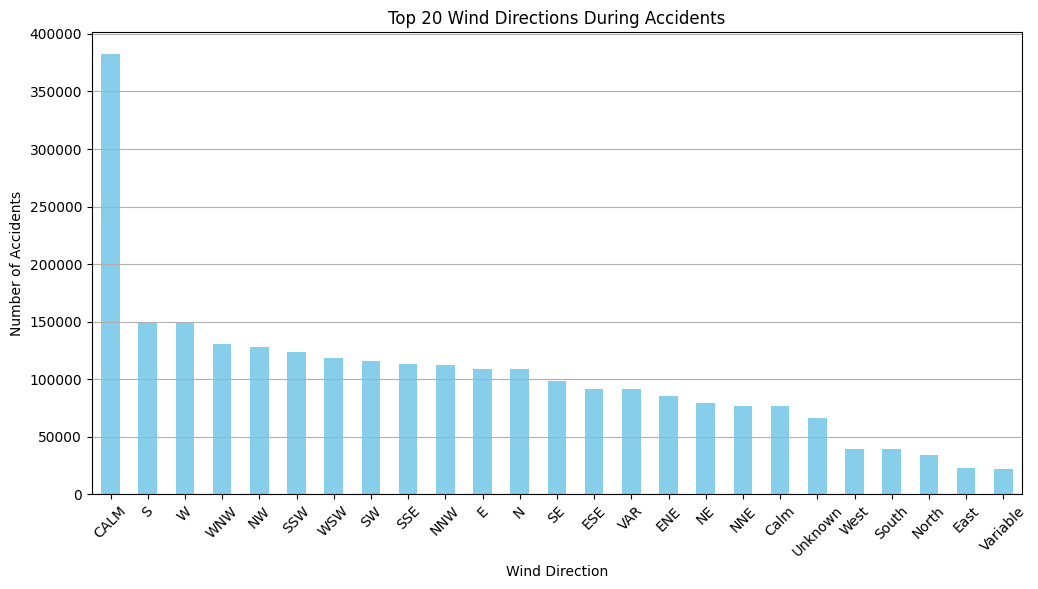

In [ ]:
print("unique wind directions:")
print(df['Wind_Direction'].unique())

df['Wind_Direction'] = df['Wind_Direction'].fillna('Unknown')

accidents_by_wind_direction = df['Wind_Direction'].value_counts()

plt.figure(figsize=(12, 6))
accidents_by_wind_direction.plot(kind='bar', color='skyblue')
plt.title('Top 20 Wind Directions During Accidents')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

unique wind directions after cleaning:
['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'UNKNOWN', 'W', 'WNW', 'WSW']


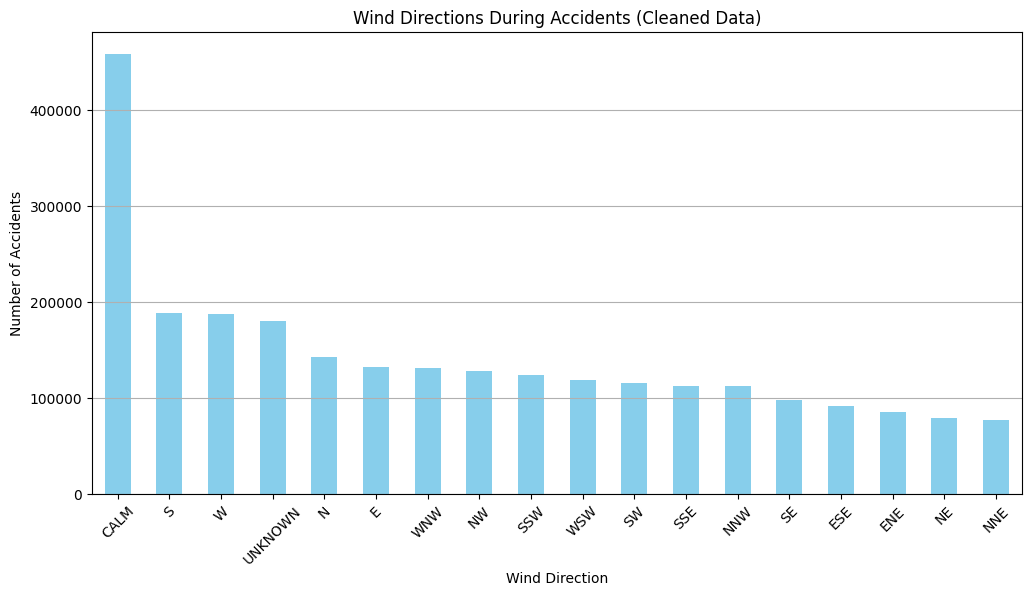

In [ ]:
# there are inconsistencies in the Wind_Direction column, such as different cases (‘CALM’ vs. ‘Calm’) and different representations of the same direction (‘S’ vs. ‘South’).

df['Wind_Direction'] = df['Wind_Direction'].str.upper()

direction_mapping = {
    'NORTH': 'N',
    'SOUTH': 'S',
    'EAST': 'E',
    'WEST': 'W',
    'VARIABLE': 'UNKNOWN',
    'VAR': 'UNKNOWN'
}

df['Wind_Direction'] = df['Wind_Direction'].replace(direction_mapping)
df['Wind_Direction'] = df['Wind_Direction'].fillna('UNKNOWN')
print("unique wind directions after cleaning:")
print(sorted(df['Wind_Direction'].unique()))

accidents_by_wind_direction = df['Wind_Direction'].value_counts()

plt.figure(figsize=(12, 6))
accidents_by_wind_direction.plot(kind='bar', color='skyblue')
plt.title('Wind Directions During Accidents (Cleaned Data)')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

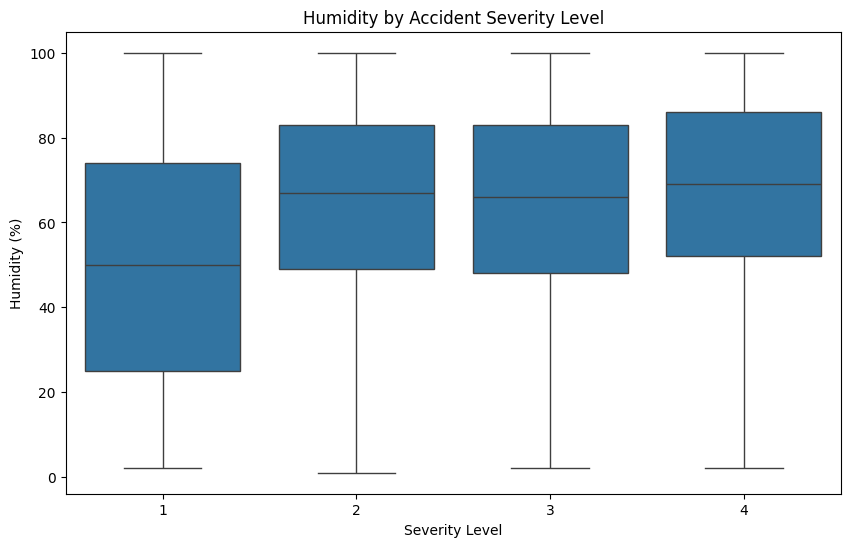

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Humidity(%)', data=df)
plt.title('Humidity by Accident Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Humidity (%)')
plt.show()


# The severity of the accident is higher when the humidity rate is around 70. The severity of the accidents that occur when the humidity rate is around 50 percent is level 1. Not a contributing factor to accidents.

In [ ]:
correlation = df['Humidity(%)'].corr(df['Severity'])
print(f"Correlation between Humidity and Severity: {correlation:.2f}")

Correlation between Humidity and Severity: 0.04


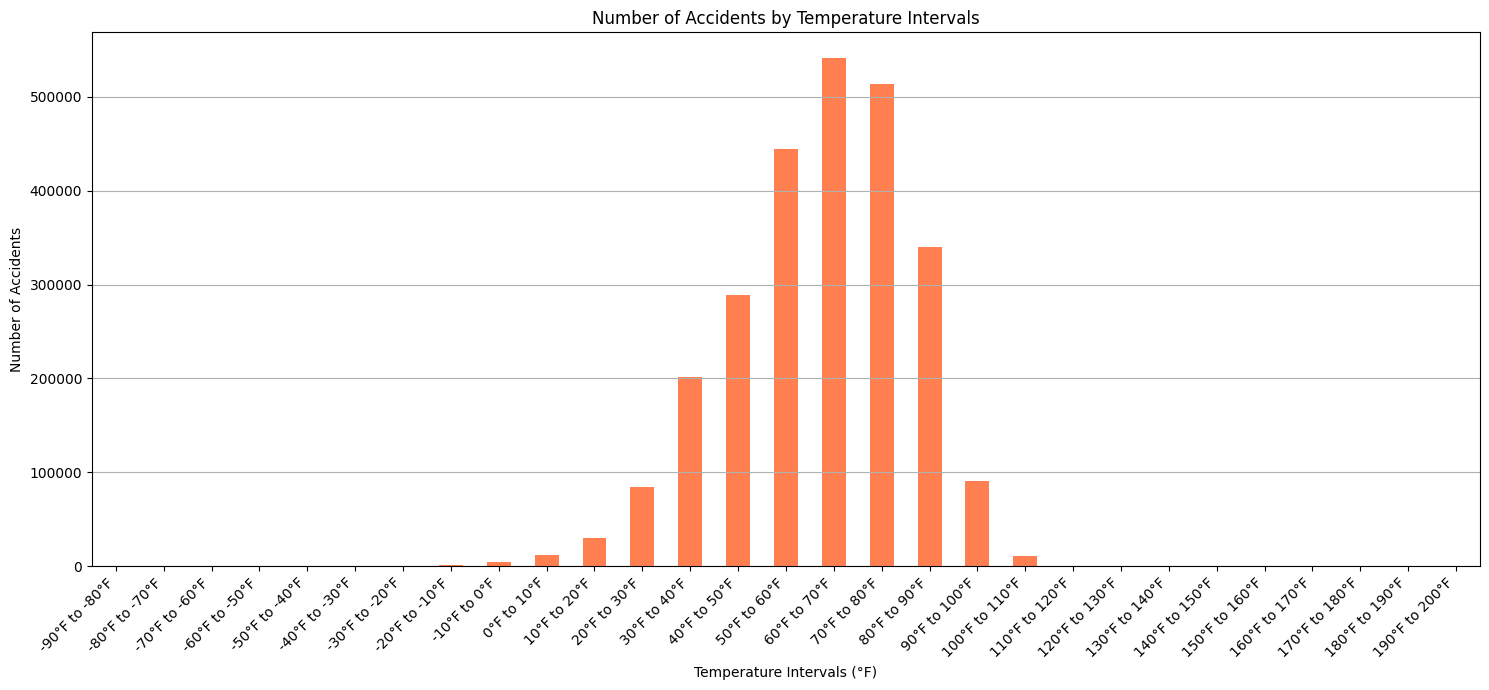

In [ ]:
df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], errors='coerce')

df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())

# temperature bins every 10 F
min_temp = int(df['Temperature(F)'].min()) - (int(df['Temperature(F)'].min()) % 10)
max_temp = int(df['Temperature(F)'].max()) + (10 - int(df['Temperature(F)'].max()) % 10)
temp_bins = list(range(min_temp, max_temp + 10, 10))

# labels for intervals
temp_labels = [f"{temp_bins[i]}°F to {temp_bins[i+1]}°F" for i in range(len(temp_bins)-1)]

# bin the temperature data
df['Temp_Bin'] = pd.cut(df['Temperature(F)'], bins=temp_bins, labels=temp_labels, right=False)

accidents_by_temp_bin = df['Temp_Bin'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
accidents_by_temp_bin.plot(kind='bar', color='coral')
plt.title('Number of Accidents by Temperature Intervals')
plt.xlabel('Temperature Intervals (°F)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

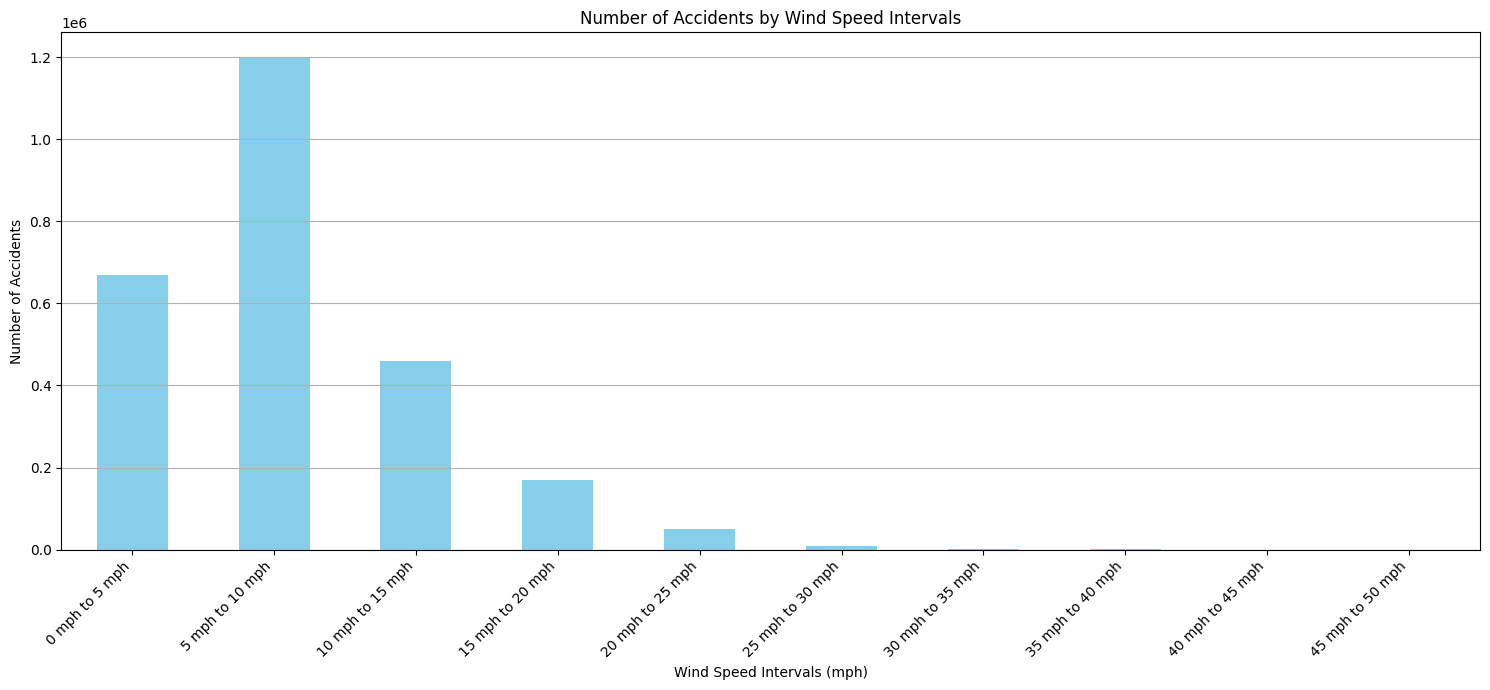

In [ ]:
df['Wind_Speed(mph)'] = pd.to_numeric(df['Wind_Speed(mph)'], errors='coerce')
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

min_wind_speed = int(df['Wind_Speed(mph)'].min()) - (int(df['Wind_Speed(mph)'].min()) % 5)
max_wind_speed = int(df['Wind_Speed(mph)'].max()) + (5 - int(df['Wind_Speed(mph)'].max()) % 5)
wind_speed_bins = list(range(min_wind_speed, max_wind_speed + 5, 5))

# labels for wind speed intervals
wind_speed_labels = [f"{wind_speed_bins[i]} mph to {wind_speed_bins[i+1]} mph" for i in range(len(wind_speed_bins)-1)]

# bin the wind speed
df['Wind_Speed_Bin'] = pd.cut(df['Wind_Speed(mph)'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# num of accidents in each wind speed bin
accidents_by_wind_speed_bin = df['Wind_Speed_Bin'].value_counts().sort_index().head(10)

plt.figure(figsize=(15, 7))
accidents_by_wind_speed_bin.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Wind Speed Intervals')
plt.xlabel('Wind Speed Intervals (mph)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### **Task 8: Groupby aggregation and pivot**
Group the data by a categorical columns.
* Group by Wind Direction and Aggregate Weather Conditions.
* Pivot table showing the count of incidents for each Airport_Code and Severity level.
* Group the Data:
  * Create a pivot table that groups by:
	* Weather_Condition
	* Severity
	* Wind_Direction
  *For each group, calculate the following metrics:
	* Average Temperature (F)
	* Total Precipitation (in)
	* Maximum Wind Speed (mph)
	* Count of unique Airport_Code entries (indicating the number of distinct locations affected)

* Filter the Data:
	* Filter the results to show only those records where:
	  * The average Temperature(F) is below freezing point (i.e., less than 32°F).
	  * The Severity of the incidents is 3 or higher.


In [ ]:
# handle missing values

df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], errors='coerce')
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())

df['Precipitation(in)'] = pd.to_numeric(df['Precipitation(in)'], errors='coerce')
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0)

df['Wind_Speed(mph)'] = pd.to_numeric(df['Wind_Speed(mph)'], errors='coerce')
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

df['Wind_Direction'] = df['Wind_Direction'].fillna('UNKNOWN').str.upper()

df['Weather_Condition'] = df['Weather_Condition'].fillna('UNKNOWN').str.upper()

df['Airport_Code'] = df['Airport_Code'].fillna('UNKNOWN')

df['Severity'] = df['Severity'].astype(int)

In [ ]:

grouped_df = df.groupby(['Weather_Condition', 'Severity', 'Wind_Direction']).agg({
    'Temperature(F)': 'mean',
    'Precipitation(in)': 'sum',
    'Wind_Speed(mph)': 'max',
    'Airport_Code': pd.Series.nunique
}).reset_index()

In [ ]:
filtered_df = grouped_df[
    (grouped_df['Temperature(F)'] < 32) &
    (grouped_df['Severity'] >= 3)
]
filtered_df = filtered_df.sort_values(by=['Severity', 'Temperature(F)'])

print("Filtered Results (Average Temperature < 32°F and Severity >= 3):")
print(filtered_df.head())

Filtered Results (Average Temperature < 32°F and Severity >= 3):
     Weather_Condition  Severity Wind_Direction  Temperature(F)  \
51        BLOWING SNOW         3             SW             3.0   
878         HEAVY SNOW         3        UNKNOWN             9.0   
53        BLOWING SNOW         3            WSW            11.0   
2697              SNOW         3            WSW            12.1   
52        BLOWING SNOW         3            WNW            12.6   

      Precipitation(in)  Wind_Speed(mph)  Airport_Code  
51                  0.0             11.5             1  
878                 0.0              7.0             1  
53                  0.0             25.3             3  
2697                0.0             27.6             3  
52                  0.0             18.4             2  


In [ ]:
pivot_table = df.pivot_table(
    index='Airport_Code',
    columns='Severity',
    values='ID',
    aggfunc='count',
    fill_value=0
)

print("Pivot Table: Incidents Count for Each Airport_Code and Severity Level")
print(pivot_table.head())

Pivot Table: Incidents Count for Each Airport_Code and Severity Level
Severity      1    2  3   4
Airport_Code               
K01M          0   19  0   3
K04V          0    6  1  13
K04W          0  665  6   4
K06D          0    5  0   0
K08D          0   45  0   0


In [ ]:
# num of unique Airport_Codes affected by Weather_Condition and Severity
pivot_weather_severity = grouped_df.pivot_table(
    index='Weather_Condition',
    columns='Severity',
    values='Airport_Code',
    aggfunc='sum',
    fill_value=0
)

print("Pivot Table: Airport Codes by Weather Condition and Severity")
print(pivot_weather_severity.head())

Pivot Table: Airport Codes by Weather Condition and Severity
Severity              1   2   3   4
Weather_Condition                  
BLOWING DUST          1  41   2   0
BLOWING DUST / WINDY  4  34   4   4
BLOWING SNOW          0  38  12  19
BLOWING SNOW / WINDY  0  30   0   1
BLOWING SNOW NEARBY   0   1   0   0


### **Task 9: Data visualization of numerical variables**
Create visualizations for key numerical variables to visualize their distributions, etc.


In [ ]:
numerical_vars = [
    'Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

for var in numerical_vars:
    df[var] = pd.to_numeric(df[var], errors='coerce')
    df[var] = df[var].fillna(df[var].median())

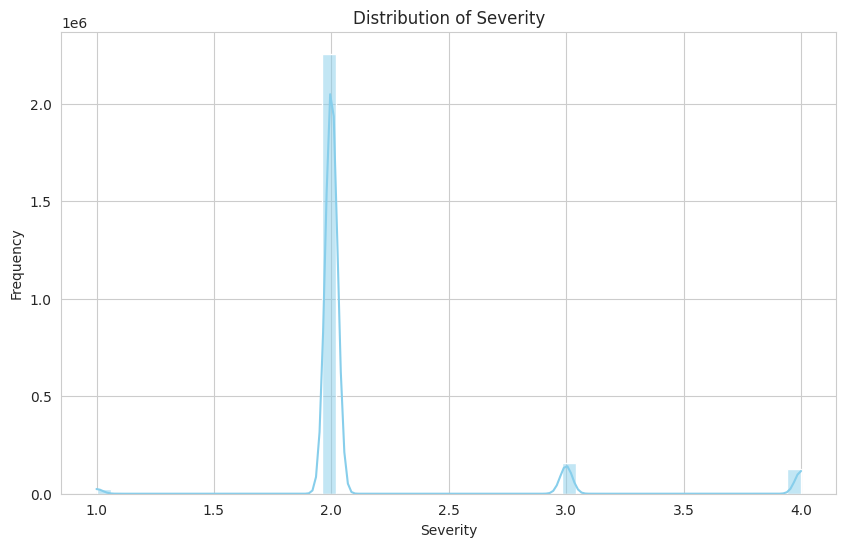

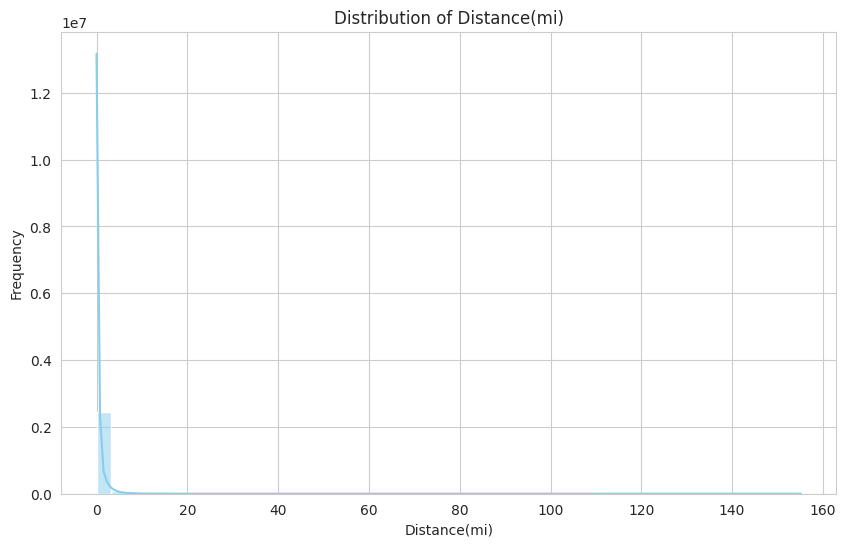

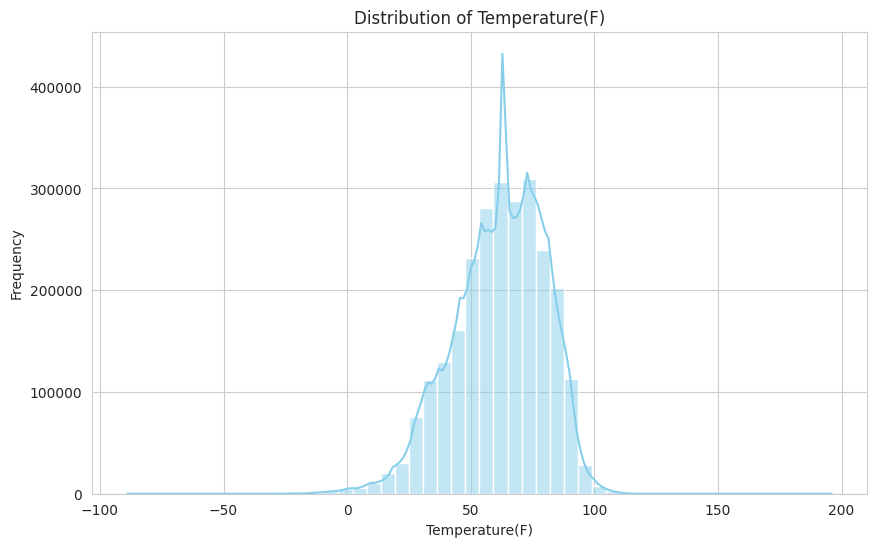

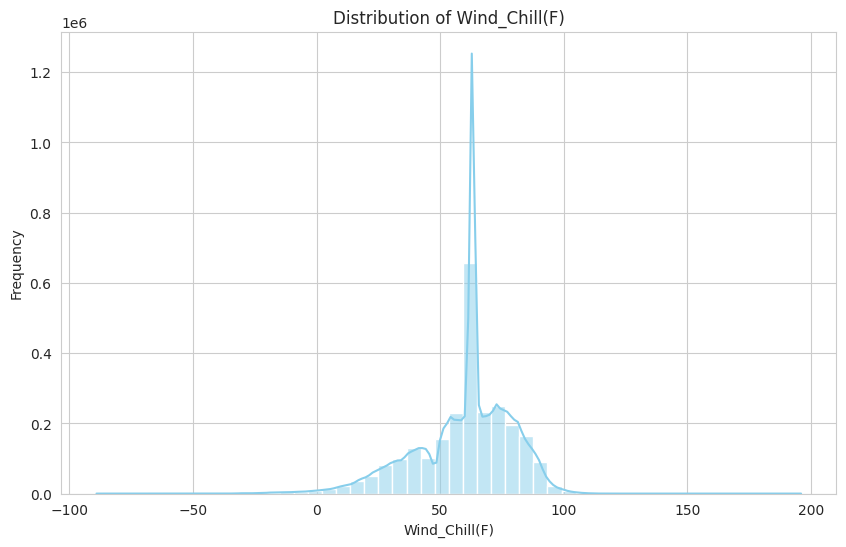

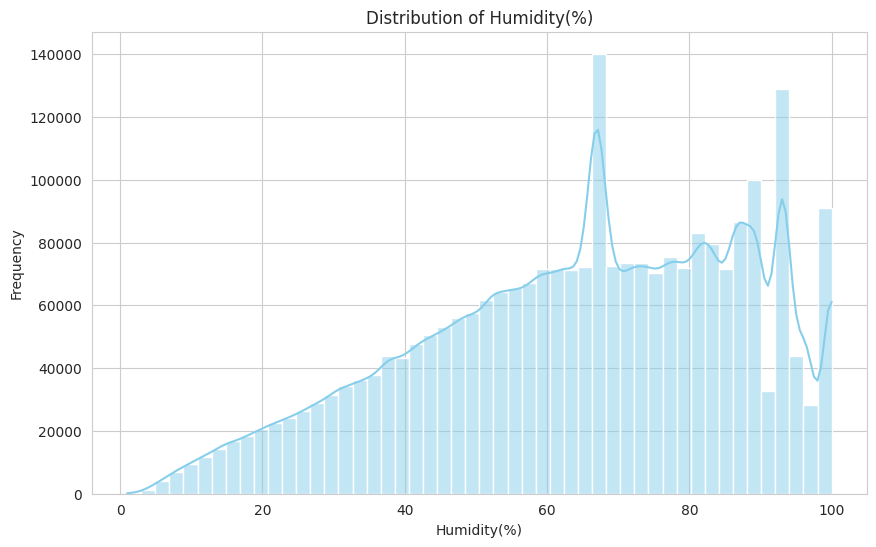

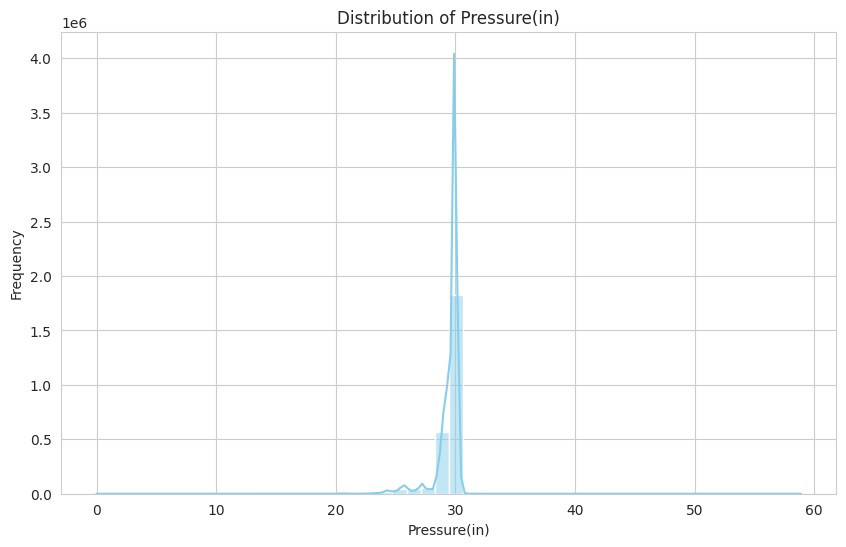

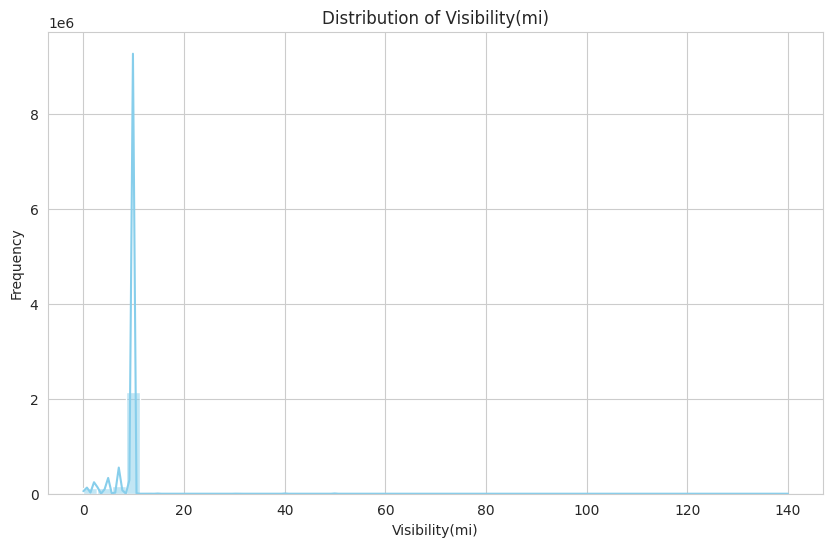

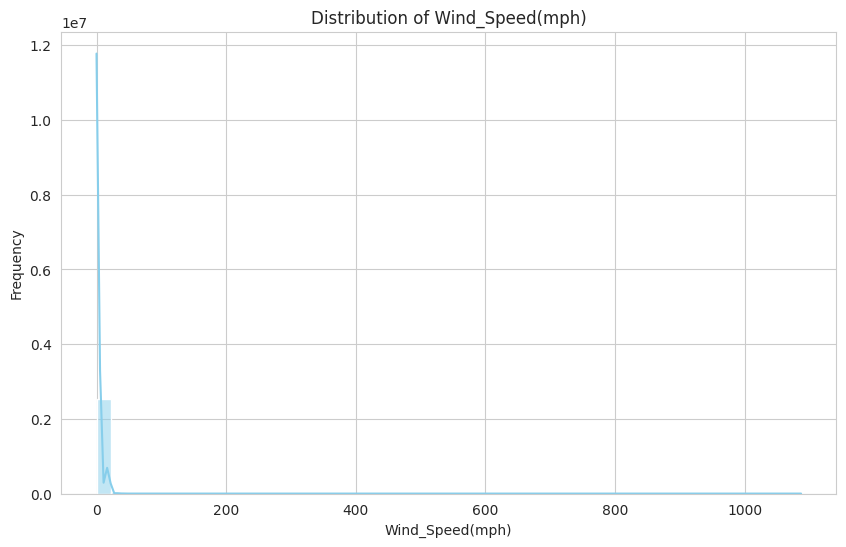

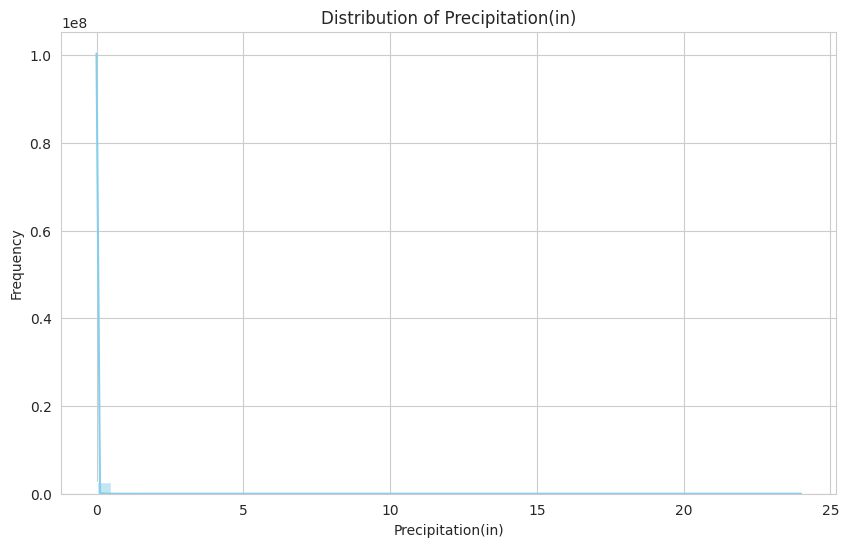

In [ ]:
sns.set_style('whitegrid')

for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

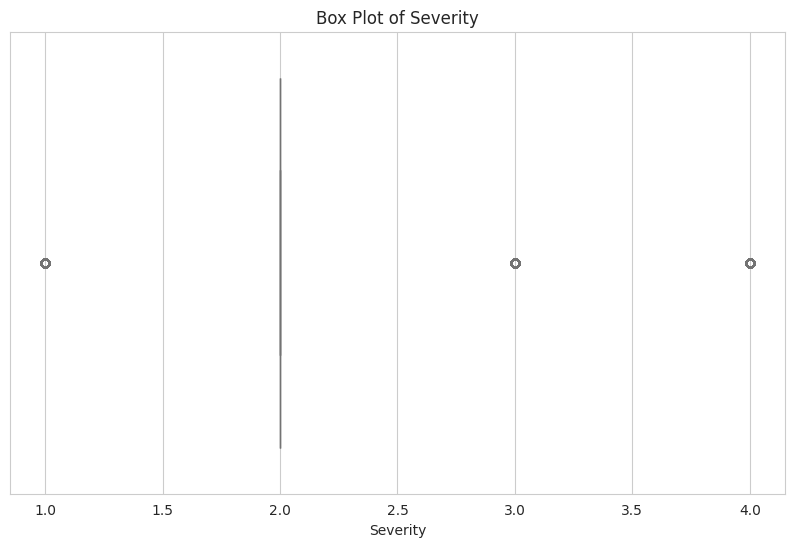

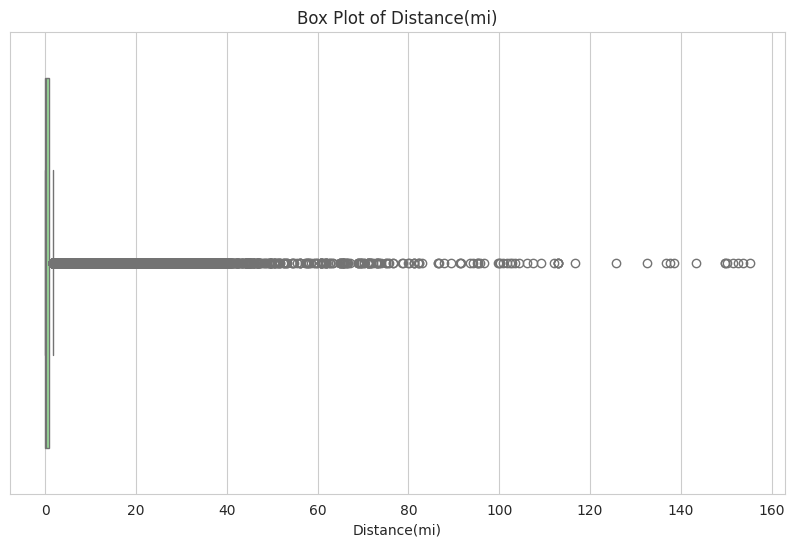

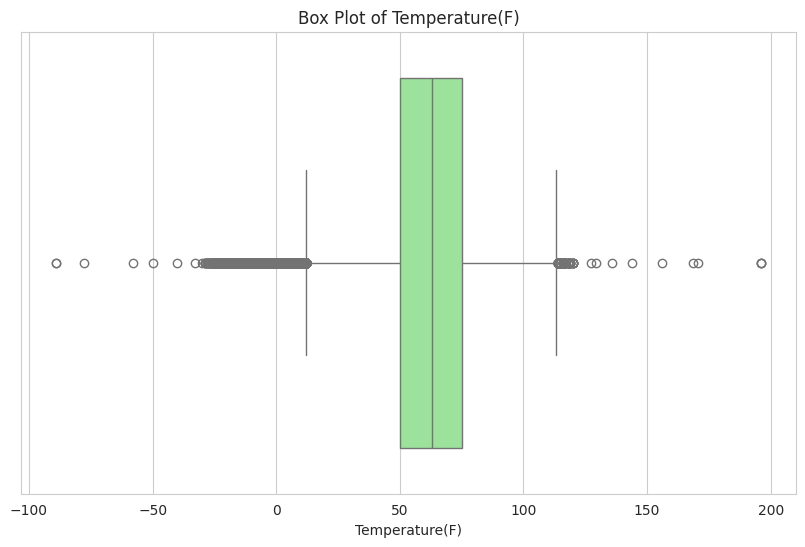

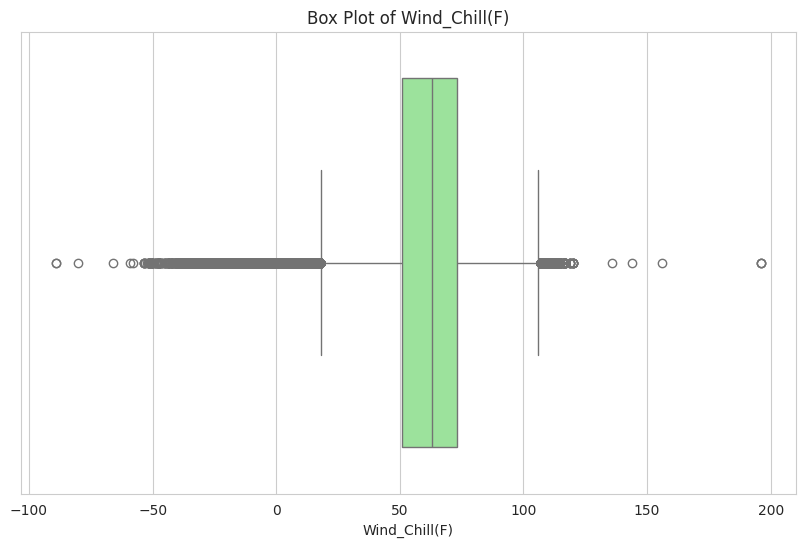

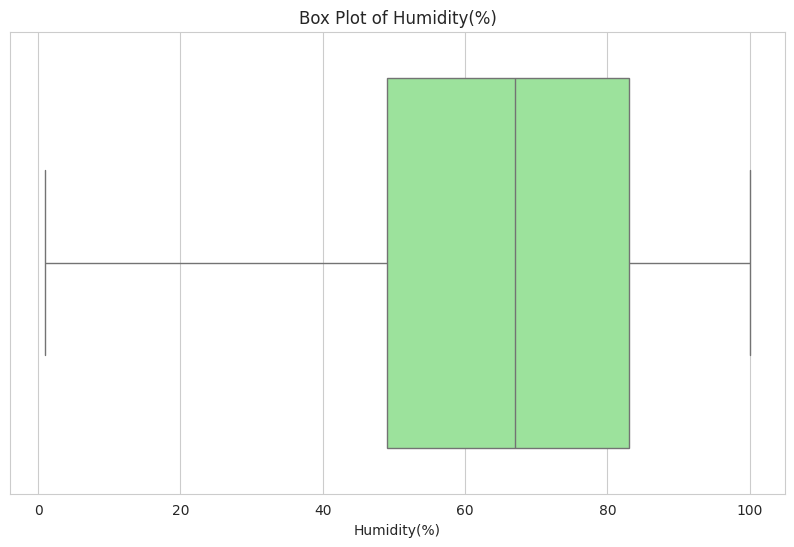

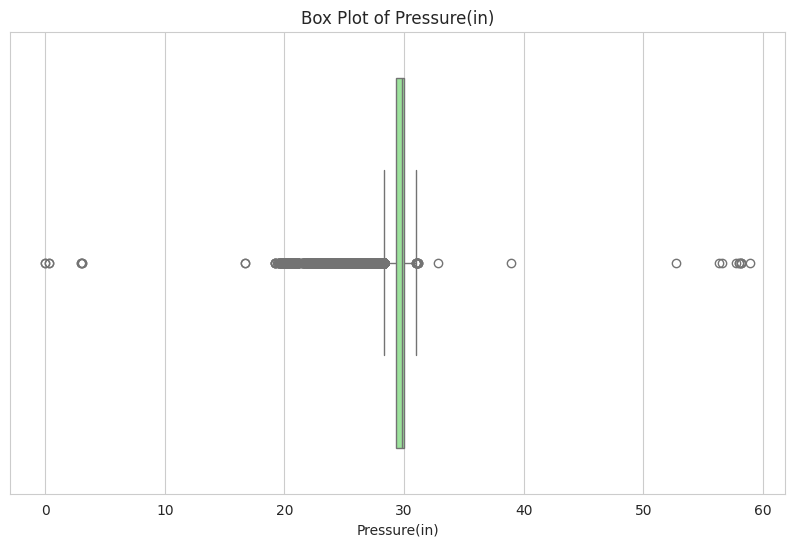

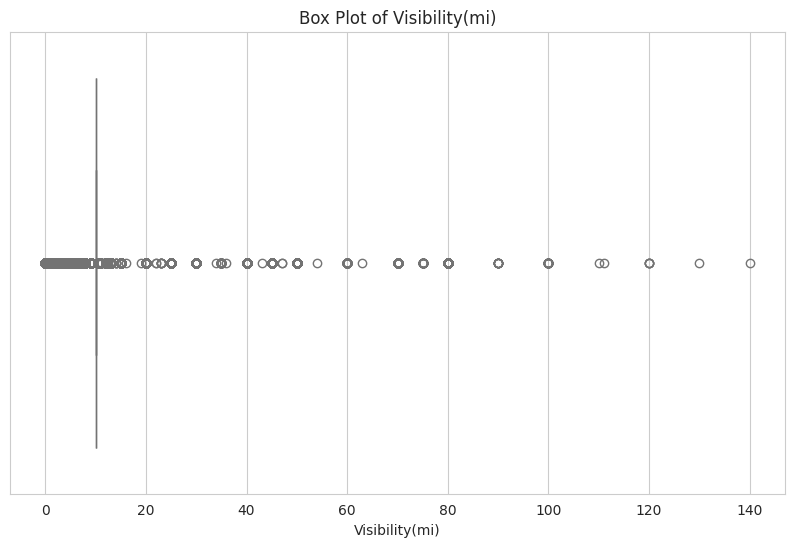

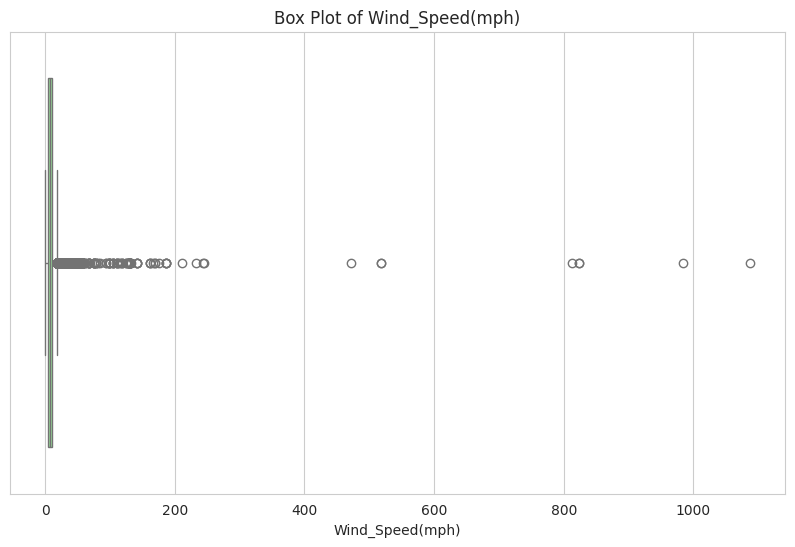

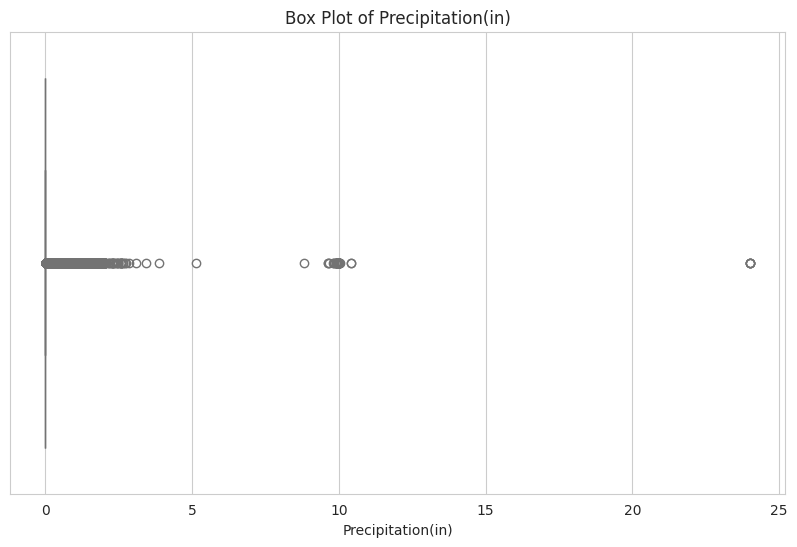

In [ ]:
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var], color='lightgreen')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

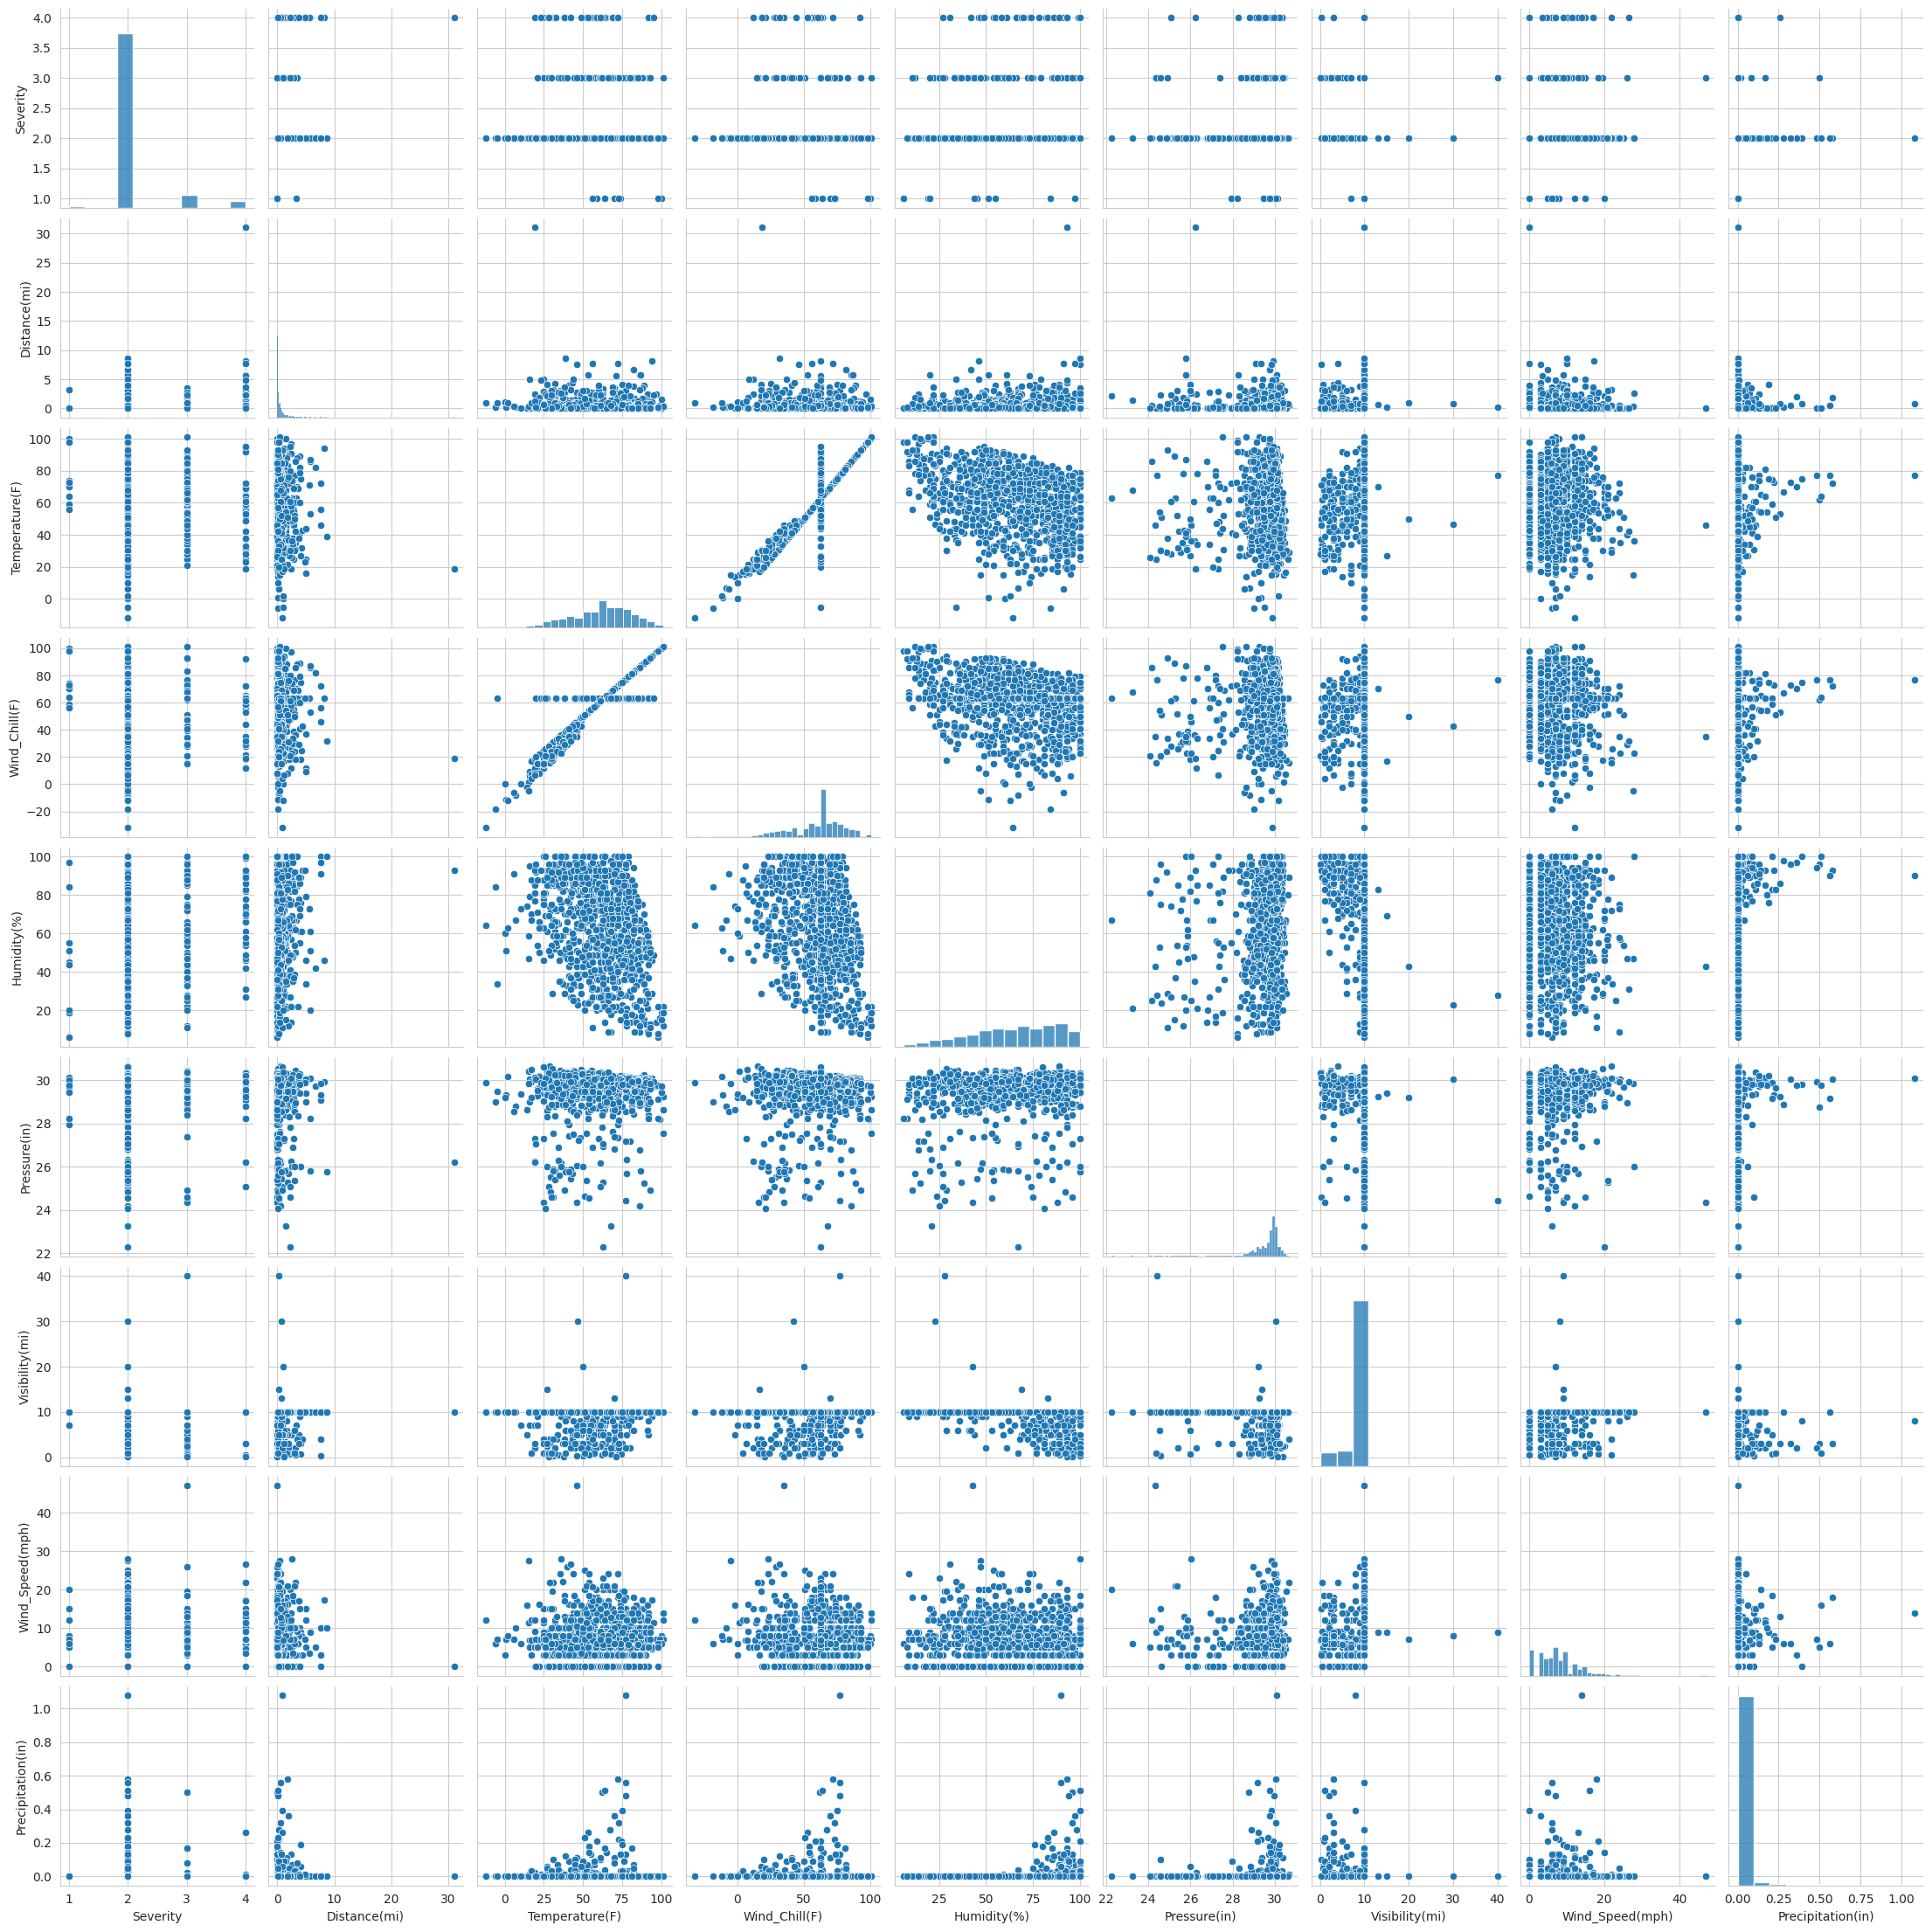

In [ ]:
sample_df = df[numerical_vars].sample(n=1000, random_state=42)

sns.pairplot(sample_df)
plt.show()

### **Task 10: Create at least 2 new features derived from the existing data.**
New features should provide meaningful insights.

In [ ]:
# new feature 1: accident duration (in minutes). Duration of each accident in minutes - computing the difference between the End_Time and Start_Time

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

df = df[df['Duration_Minutes'] > 0]
df[['Start_Time', 'End_Time', 'Duration_Minutes']].head()

,Start_Time,End_Time,Duration_Minutes
0,2016-02-08 00:37:08,2016-02-08 06:37:08,360.0
1,2016-02-08 05:56:20,2016-02-08 11:56:20,360.0
2,2016-02-08 06:15:39,2016-02-08 12:15:39,360.0
3,2016-02-08 06:51:45,2016-02-08 12:51:45,360.0
4,2016-02-08 07:53:43,2016-02-08 13:53:43,360.0


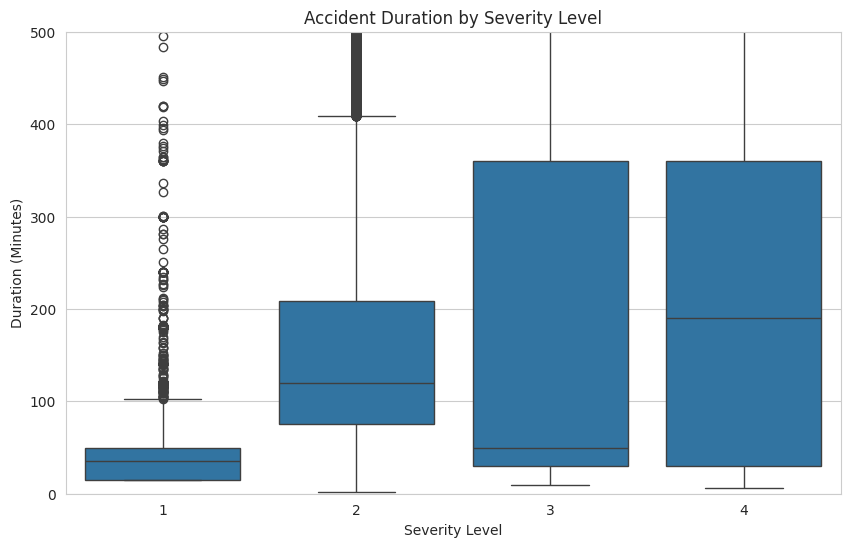

In [ ]:
# relationship between accident duration and severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Duration_Minutes', data=df)
plt.title('Accident Duration by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Duration (Minutes)')
plt.ylim(0, 500)
plt.show()

In [ ]:
# new feature 2: day of week. extrac the day of the week from the Start_Time to analyze accident occurrences on different days

df['Day_of_Week_Num'] = df['Start_Time'].dt.dayofweek

day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['Day_of_Week'] = df['Day_of_Week_Num'].map(day_mapping)
df[['Start_Time', 'Day_of_Week']].head()

,Start_Time,Day_of_Week
0,2016-02-08 00:37:08,Monday
1,2016-02-08 05:56:20,Monday
2,2016-02-08 06:15:39,Monday
3,2016-02-08 06:51:45,Monday
4,2016-02-08 07:53:43,Monday


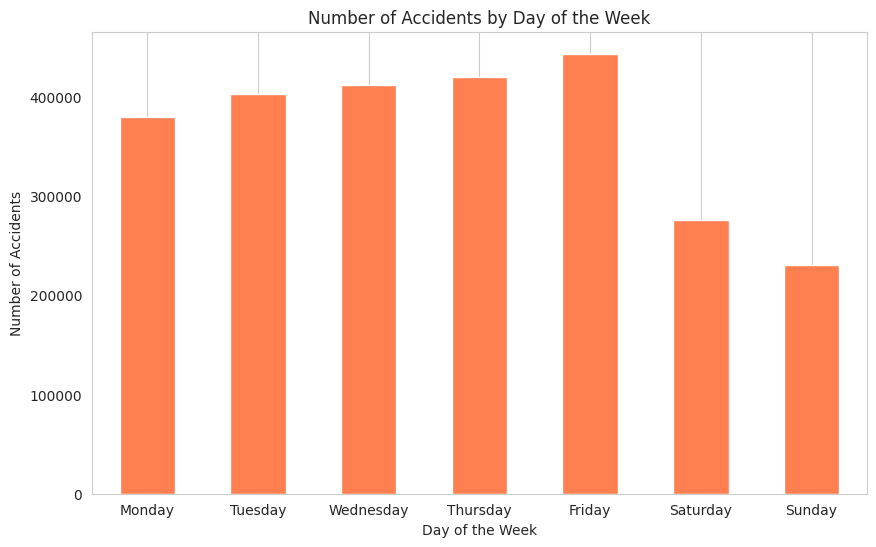

In [ ]:
accidents_by_day = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='coral')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

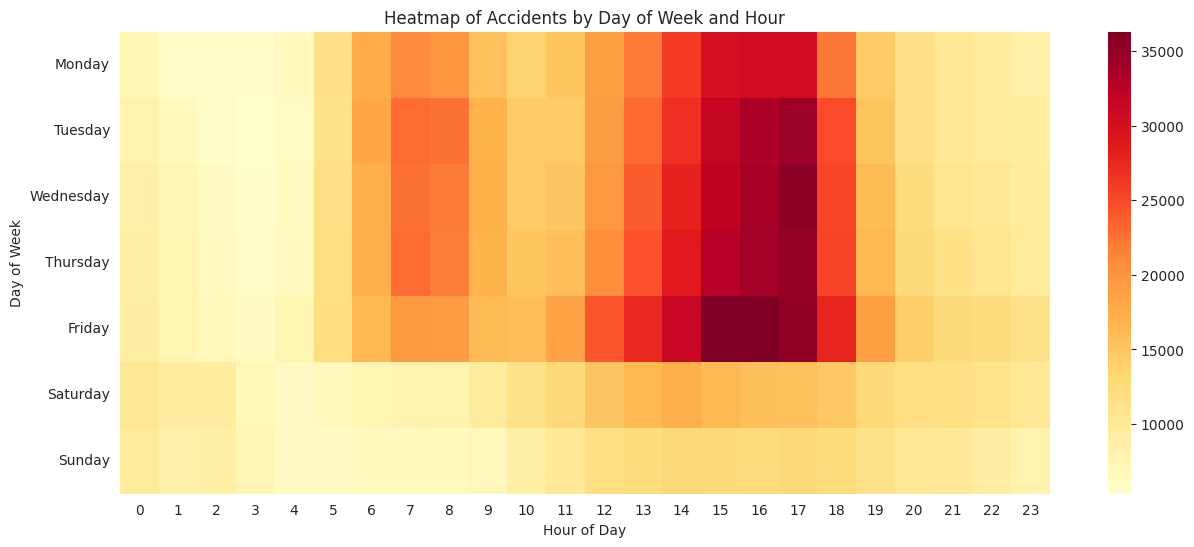

In [ ]:
# accidents by day and time

df['Hour'] = df['Start_Time'].dt.hour

accidents_pivot = df.pivot_table(index='Day_of_Week', columns='Hour', values='ID', aggfunc='count')

accidents_pivot = accidents_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 6))
sns.heatmap(accidents_pivot, cmap='YlOrRd')
plt.title('Heatmap of Accidents by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

### **Task 11:**
Analyze the dataset in detail, for example, what insights have you gained from it? What additional information or features could have been included to enhance the analysis?

Accidents by time of day

	• Accidents are most frequent during morning (6 AM to 9 AM) and evening (4 PM to 7 PM) rush hours
	• Fewer accidents occur during late-night hours (12 AM to 5 AM) likely due to reduced traffic volumes
By day of the week

	• Higher accident counts are observed on weekdays, especially on fridays
	• ccident frequencies drop on weekends with the lowest counts on sundays

By month and season

	• Months like december and january, show increased accident counts, possibly due to winter weather conditions
	• Accidents may also rise during summer months due to increased travel

Geographical distribution of accidents

	• States like California (CA), Texas (TX), and Florida (FL) have the highest total number of accidents
	• Accidents frequently occur near junctions, crossings, and traffic signals.

Impact of weather conditions

    • Accidents during weather conditions like light blowing snow, light snow shower, patches of fog / windy tend to be more severe.
    • Accidents during no wind direction which means calm, have much more counts.
    • Number of accidents are higher when the temperature is between 50 - 80 F.
Correlation Between Variables

    • Higher severity accidents are associated with longer durations, potentially due to more complex investigations and clearance operations
    • Most accidents occur at lower wind speeds (0-10 mph)

  Additional information / features to enhance the analysis

    • Data on driver demographics, experience levels, or behaviors can identify human factors contributing to accidents
    • Crash severity can be considered to determine the effects of crashes on the human body using data on which car models
    • Including population density, income levels, and urbanization rates can contextualize crash data.


